# Case: Spatially and time varying forcing function

## Initial Conditions

- First Initial Condition: 
$$\exp\left[-\frac{1}{2} \left(\left(\frac{\boldsymbol{x}_{0}-0.01}{5}\right)^{2} + \left(\frac{\boldsymbol{x}_{1}-0.01}{5}\right)^{2} \right) \right]$$
- Second Inital Condition:
$$2* \exp\left[-0.1\left( \left(\boldsymbol{x}_{0}-1.0\right)^{2} + \left(\boldsymbol{x}_{1}-1.0\right)^{2} \right) \right]$$

In [1]:
from pydci.examples.heat_model import HeatModel
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import importlib

from pydci import OnlineSequential
from pydci.log import enable_log, disable_log
from pydci.utils import get_df, set_seed

# Create initial condition
def initial_condition(x, a=5):
    return np.exp(-a * (x[0] ** 2 + x[1] ** 2))

class ForcingFunction:
    def __init__(self):
        self.t = 0.0

    def eval(self, x):
        # Added some spatial variation here. Expression is sin(t)*x
        return np.full(
            x.shape[1],
            (10*np.sin(6 * np.pi * self.t) * x[0]
            + 10*np.cos(4 * np.pi * self.t) * x[1]),
        )

num_modes = 10
set_seed(2023)
enable_log(level="DEBUG")
heat_model_args = dict(
    x0=initial_condition,
    measurement_noise=0.05,
    solve_ts=0.0001,
    sample_ts=0.05,
    nx=50,
    ny=50,
    mean=1.0,
    std_dev=0.2,
    length_scales=[0.1, 0.1],
    nmodes=num_modes,
    true_k_x=None,
    max_states=500,
    forcing_expression=ForcingFunction(),
)

[08/18/23 16:47:02] INFO     Logger initialized                                                           ]8;id=115980;file:///Users/carlos/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=851975;file:///Users/carlos/repos/pyDCI/src/pydci/log.py#87\87]8;;\

In [2]:
hm = HeatModel(**heat_model_args)
hm.lam_true

                    DEBUG    Setting up simulation                                                 ]8;id=98111;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=307783;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py#99\99]8;;\

[08/18/23 16:47:05] DEBUG    State idxs set at 500 of 2601 total indices                               ]8;id=709225;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=410511;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#100\100]8;;\

array([ 0.71167353, -0.32448496, -1.00187064,  0.23625079, -0.10215984,
       -1.14129263,  2.65440726,  1.44060519,  0.09890227, -3.12153215])

Text(0.5, 1.0, 'True Field $k(x)$')

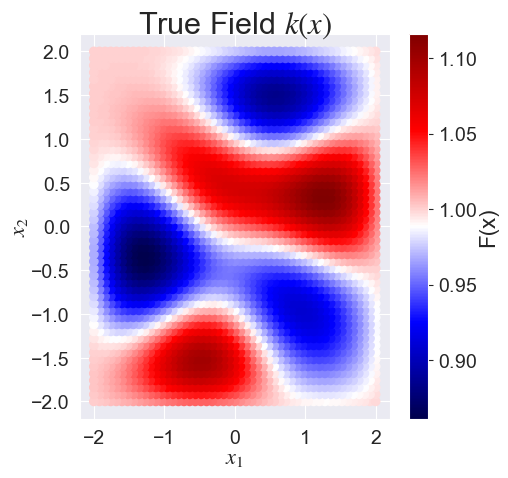

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
hm.plot_field(field=hm.lam_true, ax=ax)
ax.set_title('True Field $k(x)$')

# Full Sim

In [4]:
solver_params = dict(
    num_its=10,
    max_t=None,
    num_samples=100,
    max_sample_size=200,
    samples_inc=50,
    time_step=0.5,
    exp_thresh=0.2,
    kl_thresh=3.0,
    min_eff_sample_size=0.9,
    num_tries_per_it=2,
    sampling_args={
        "dist": "normal",
        "mean": 0.0,
        "std_dev": 2.0,
    },
    solver_args=dict(
        pca_range=range(1, 3),
        split_range=range(1, 10),
        best_method="max_kl",
        all_data=True,
    ),
    make_plots=False,
    reset_model=False,
    reset_samples=False,
    seed=21, # Make sure different than seed set at beginning of notebook
)
solver_params

{'num_its': 10,
 'max_t': None,
 'num_samples': 100,
 'max_sample_size': 200,
 'samples_inc': 50,
 'time_step': 0.5,
 'exp_thresh': 0.2,
 'kl_thresh': 3.0,
 'min_eff_sample_size': 0.9,
 'num_tries_per_it': 2,
 'sampling_args': {'dist': 'normal', 'mean': 0.0, 'std_dev': 2.0},
 'solver_args': {'pca_range': range(1, 3),
  'split_range': range(1, 10),
  'best_method': 'max_kl',
  'all_data': True},
 'make_plots': False,
 'reset_model': False,
 'reset_samples': False,
 'seed': 21}

In [5]:
enable_log(level='DEBUG', filter='pydci.consistent_bayes.OnlineSequential')
prob = OnlineSequential(
    hm, # Use this to not use saved seed and start fresh - HeatModel(**heat_model_args),
    time_step=0.5,
)
prob.solve(**solver_params)

[08/18/23 16:47:10] INFO     Setting seed to 21                                             ]8;id=519175;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=145886;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#605\605]8;;\

                    INFO     No previous data -> Starting from initial                      ]8;id=511247;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=403933;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    DEBUG    make_plots: False                                              ]8;id=99941;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=52156;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\

                    INFO     Starting online solve with 100 samples at data chunk 0         ]8;id=627786;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=714101;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#653\653]8;;\

                    DEBUG    Getting measurements over time window 0 to 0.5                 ]8;id=568944;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=938380;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#658\658]8;;\

[08/18/23 16:47:14] DEBUG    Starting solves for iteration 0                                ]8;id=617803;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=264298;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#670\670]8;;\

                    DEBUG    Max sample size: 200, samples_inc: 50                          ]8;id=881890;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=970502;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#439\439]8;;\

                    INFO     Starting from initial Reset:False, Data_Idx: 0                 ]8;id=754410;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=652781;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#493\493]8;;\
                             Sampling Args: {'dist': 'normal', 'mean': 0.0, 'std_dev': 2.0}                        
                             Solver Args: {'pca_range': range(1, 3), 'split_range':                                
                             range(1, 10), 'best_method': 'max_kl', 'all_data': True}                              

                    INFO     Advancing forward model for 100 samples                        ]8;id=816527;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=874301;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#503\503]8;;\

[08/18/23 16:54:46] DEBUG    Solving UN-WEIGHTED 100 samples. Args: {'pca_range': range(1,  ]8;id=893894;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=719308;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#518\518]8;;\
                             3), 'split_range': range(1, 10), 'best_method': 'max_kl',                             
                             'all_data': True}                                                                     

[08/18/23 16:54:52] INFO     Solved SUCCEEDED (s = 100). Results:                           ]8;id=389812;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=961418;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#558\558]8;;\
                                     e_r        kl  k_eff  k_eff_up  solved  \                                     
                             0  1.058571  1.819975   1.00      0.65    True                                        
                             0  0.741669  2.787553   1.00      0.81   False                                        
                             0  1.067550  0.254806   0.72      0.68    True                                        
                             0  1.086870  0.178547   0.76      0.74    True                                        
                             0  0.407932  1.515412   0.60      0.57   False                                        
                             0  0.743551  1.387061   1.00      0.96   False                                        
                             0  0.323549  6.303217   0.73      0.81   False                                        
                             0  1.038419  0.098608   0.94      0.91    True                                        
                             0  0.606441  1.080044   1.00      1.00   False                                        
                             0  0.531540  2.930697   1.00      0.49   False                                        
                             0  0.133885  3.582062   0.74      0.54   False                                        
                             0  0.581499  2.833744   1.00      0.89   False                                        
                             0  1.423419  1.466361   1.00      0.78   False                                        
                             0  0.738368  1.008217   1.00      1.00   False                                        
                             0  0.569833  1.514981   1.00      0.93   False                                        
                             0  0.740042  0.635037   0.83      0.71   False                                        
                             0  0.726745  1.280002   1.00      1.00   False                                        
                             0  0.668618  1.608837   1.00      1.00   False                                        
                                                                                                                   
                                                                            error                                  
                             lam_MUD_0  lam_MUD_1  \                                                               
                             0                                               None                                  
                             -1.257815   1.293018                                                                  
                             0  Failed to solve problem on iteration 1 - |E(r)...                                  
                             -1.257815   1.293018                                                                  
                             0                                               None                                  
                             0.520605   2.861975                                                                   
                             0                                               None                                  
                             0.520605   2.861975                                                                   
                             0  Failed to solve problem on iteration 5 - |E(r)...                                  
                             0.538543   0.872553                                

                    DEBUG    Getting measurements over time window 0.5 to 1.0               ]8;id=424902;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=373532;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#658\658]8;;\

[08/18/23 16:54:59] DEBUG    Starting solves for iteration 1                                ]8;id=951272;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=71741;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#670\670]8;;\

                    DEBUG    Max sample size: 200, samples_inc: 50                          ]8;id=770201;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=299056;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#439\439]8;;\

                    INFO     Re-setting weights: 0.65 < 0.9).                               ]8;id=634059;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=774961;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#472\472]8;;\

                    INFO     Re-sampling from pi_up_0                                       ]8;id=283357;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=641416;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#475\475]8;;\

                    INFO     Advancing forward model for 100 samples                        ]8;id=644232;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=536609;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#503\503]8;;\

[08/18/23 17:03:05] DEBUG    Solving UN-WEIGHTED 100 samples. Args: {'pca_range': range(1,  ]8;id=284614;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=843713;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#518\518]8;;\
                             3), 'split_range': range(1, 10), 'best_method': 'max_kl',                             
                             'all_data': True, 'search_exp_thresh': 0.2}                                           

[08/18/23 17:03:10] INFO     Solved SUCCEEDED (s = 100). Results:                           ]8;id=169959;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=382721;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#558\558]8;;\
                                     e_r        kl  k_eff  k_eff_up  solved  \                                     
                             0  1.014154  1.329658   1.00      0.67    True                                        
                             0  1.014223  0.174058   0.85      0.73    True                                        
                             0  0.974191  0.094523   0.83      0.77    True                                        
                             0  0.959729  0.124795   0.79      0.74    True                                        
                             0  0.970579  0.153360   0.76      0.76    True                                        
                             0  0.904610  0.110001   0.89      0.92    True                                        
                             0  0.716996  1.031461   0.79      0.88   False                                        
                             0  0.746552  0.843954   0.94      0.91   False                                        
                             0  0.674596  0.570771   0.88      0.83   False                                        
                             0  0.320423  2.455764   1.00      0.42   False                                        
                             0  0.433758  1.925904   1.00      0.61   False                                        
                             0  0.930391  0.284081   0.62      0.52    True                                        
                             0  0.478367  3.349126   0.89      0.72   False                                        
                             0  0.622388  3.974713   0.94      0.75   False                                        
                             0  0.315693  3.351894   0.97      0.86   False                                        
                             0  0.354826  3.456031   0.97      0.87   False                                        
                             0  0.557631  1.396619   0.94      0.85   False                                        
                             0  0.293323  2.098144   0.95      0.96   False                                        
                                                                                                                   
                                                                            error                                  
                             lam_MUD_0  lam_MUD_1  \                                                               
                             0                                               None                                  
                             0.422582   0.951414                                                                   
                             0                                               None                                  
                             0.688204   2.475781                                                                   
                             0                                               None                                  
                             0.422582   0.951414                                                                   
                             0                                               None                                  
                             0.688204   2.475781                                                                   
                             0                                               None                                  
                             0.469898   0.711372                                

                    DEBUG    Getting measurements over time window 1.0 to 1.5               ]8;id=181261;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=866134;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#658\658]8;;\

[08/18/23 17:03:16] DEBUG    Starting solves for iteration 2                                ]8;id=844870;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=318537;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#670\670]8;;\

                    DEBUG    Max sample size: 200, samples_inc: 50                          ]8;id=416106;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=163990;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#439\439]8;;\

                    INFO     Re-setting weights: 0.67 < 0.9).                               ]8;id=803282;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=447189;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#472\472]8;;\

                    INFO     Re-sampling from pi_up_1                                       ]8;id=865316;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=520150;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#475\475]8;;\

                    INFO     Advancing forward model for 100 samples                        ]8;id=610425;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=473376;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#503\503]8;;\

[08/18/23 17:12:20] DEBUG    Solving UN-WEIGHTED 100 samples. Args: {'pca_range': range(1,  ]8;id=674940;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=350091;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#518\518]8;;\
                             3), 'split_range': range(1, 10), 'best_method': 'max_kl',                             
                             'all_data': True, 'search_exp_thresh': 0.2}                                           

[08/18/23 17:12:25] INFO     Solved SUCCEEDED (s = 100). Results:                           ]8;id=882842;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=433811;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#558\558]8;;\
                                     e_r        kl  k_eff  k_eff_up  solved  \                                     
                             0  0.966901  1.614100   1.00      0.55    True                                        
                             0  1.051228  0.081451   0.62      0.58    True                                        
                             0  1.034467  0.031948   0.65      0.63    True                                        
                             0  0.976682  0.213980   0.70      0.74    True                                        
                             0  0.907007  0.111091   0.63      0.64    True                                        
                             0  0.972849  0.006091   0.76      0.79    True                                        
                             0  0.762340  1.541948   0.77      0.72   False                                        
                             0  0.423147  2.103735   0.87      0.91   False                                        
                             0  0.646901  0.941692   0.83      0.83   False                                        
                             0  1.932175  3.197493   1.00      0.33   False                                        
                             0  0.772366  0.248920   0.50      0.42   False                                        
                             0  0.134551  1.583781   0.69      0.28   False                                        
                             0  1.737701  1.156475   0.80      0.49   False                                        
                             0  1.312077  0.824516   1.00      0.94   False                                        
                             0  0.291201  1.774433   0.77      0.47   False                                        
                             0  0.020289  3.801552   0.58      0.42   False                                        
                             0  0.771686  1.405991   0.97      0.87   False                                        
                             0  0.693229  1.478588   0.98      0.89   False                                        
                                                                                                                   
                                                                            error                                  
                             lam_MUD_0  lam_MUD_1  \                                                               
                             0                                               None                                  
                             -0.835823  -0.277826                                                                  
                             0                                               None                                  
                             -0.835823  -0.277826                                                                  
                             0                                               None                                  
                             -0.139710   0.646941                                                                  
                             0                                               None                                  
                             0.634597  -2.263755                                                                   
                             0                                               None                                  
                             -0.139710   0.646941                               

                    DEBUG    Getting measurements over time window 1.5 to 2.0               ]8;id=105471;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=788157;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#658\658]8;;\

[08/18/23 17:12:30] DEBUG    Starting solves for iteration 3                                ]8;id=487902;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=957323;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#670\670]8;;\

                    DEBUG    Max sample size: 200, samples_inc: 50                          ]8;id=526715;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=784788;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#439\439]8;;\

                    INFO     Re-setting weights: 0.55 < 0.9).                               ]8;id=227639;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=488222;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#472\472]8;;\

                    INFO     Re-sampling from pi_up_2                                       ]8;id=320195;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=324537;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#475\475]8;;\

                    INFO     Advancing forward model for 100 samples                        ]8;id=491187;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=300701;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#503\503]8;;\

[08/18/23 17:21:30] DEBUG    Solving UN-WEIGHTED 100 samples. Args: {'pca_range': range(1,  ]8;id=782500;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=520920;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#518\518]8;;\
                             3), 'split_range': range(1, 10), 'best_method': 'max_kl',                             
                             'all_data': True, 'search_exp_thresh': 0.2}                                           

[08/18/23 17:21:35] INFO     Solved SUCCEEDED (s = 100). Results:                           ]8;id=766024;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=878098;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#558\558]8;;\
                                     e_r        kl  k_eff  k_eff_up  solved  \                                     
                             0  0.959360  1.820085   1.00      0.55    True                                        
                             0  1.058912  0.185836   0.65      0.56    True                                        
                             0  0.961507  0.240334   0.65      0.60    True                                        
                             0  0.945228  0.219280   0.64      0.63    True                                        
                             0  0.592156  1.316818   0.76      0.70   False                                        
                             0  0.704874  0.707192   0.68      0.67   False                                        
                             0  0.768225  0.225661   0.63      0.63   False                                        
                             0  0.633433  1.847218   0.83      0.70   False                                        
                             0  0.777629  0.556482   0.85      0.73   False                                        
                             0  1.342547  2.763408   1.00      0.38   False                                        
                             0  1.271422  2.129647   1.00      0.56   False                                        
                             0  0.785185  0.599820   0.75      0.52   False                                        
                             0  1.253281  0.721666   1.00      0.92   False                                        
                             0  0.401935  1.888933   0.72      0.66   False                                        
                             0  0.386528  1.059822   0.65      0.71   False                                        
                             0  0.351336  2.357174   0.87      0.61   False                                        
                             0  0.723253  1.349346   1.00      0.94   False                                        
                             0  0.499110  0.481314   0.84      0.71   False                                        
                                                                                                                   
                                                                            error                                  
                             lam_MUD_0  lam_MUD_1  \                                                               
                             0                                               None                                  
                             -0.022667   0.805367                                                                  
                             0                                               None                                  
                             1.632516   1.235702                                                                   
                             0                                               None                                  
                             -2.114026   2.043335                                                                  
                             0                                               None                                  
                             -2.114026   2.043335                                                                  
                             0  Failed to solve problem on iteration 3 - |E(r)...                                  
                             1.590953   1.242315                                

                    DEBUG    Getting measurements over time window 2.0 to 2.5               ]8;id=781836;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=237086;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#658\658]8;;\

[08/18/23 17:21:41] DEBUG    Starting solves for iteration 4                                ]8;id=57188;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=145059;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#670\670]8;;\

                    DEBUG    Max sample size: 200, samples_inc: 50                          ]8;id=880460;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=573686;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#439\439]8;;\

                    INFO     Re-setting weights: 0.55 < 0.9).                               ]8;id=229820;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=997989;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#472\472]8;;\

                    INFO     Re-sampling from pi_up_3                                       ]8;id=825640;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=517834;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#475\475]8;;\

                    INFO     Advancing forward model for 100 samples                        ]8;id=133287;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=456608;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#503\503]8;;\

[08/18/23 17:30:57] DEBUG    Solving UN-WEIGHTED 100 samples. Args: {'pca_range': range(1,  ]8;id=900153;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=86734;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#518\518]8;;\
                             3), 'split_range': range(1, 10), 'best_method': 'max_kl',                             
                             'all_data': True, 'search_exp_thresh': 0.2}                                           

[08/18/23 17:31:03] INFO     Solved SUCCEEDED (s = 100). Results:                           ]8;id=630408;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=1025;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#558\558]8;;\
                                     e_r        kl  k_eff  k_eff_up  solved  \                                     
                             0  0.977209  1.207999   1.00      0.72    True                                        
                             0  0.865594  0.696403   0.83      0.82    True                                        
                             0  0.991278  0.113434   0.93      0.86    True                                        
                             0  0.991782  0.077055   0.94      0.94    True                                        
                             0  0.734553  1.412594   0.92      0.95   False                                        
                             0  0.794550  1.531468   1.00      1.00   False                                        
                             0  0.621995  2.237266   0.88      1.00   False                                        
                             0  0.780798  1.095715   0.94      0.99   False                                        
                             0  0.718065  2.181038   0.99      0.99   False                                        
                             0  1.177376  1.973926   1.00      0.60    True                                        
                             0  0.655855  1.574416   0.75      0.71   False                                        
                             0  0.891658  0.173128   0.83      0.76    True                                        
                             0  0.594968  1.570344   0.97      0.82   False                                        
                             0  0.591354  1.040775   0.92      0.93   False                                        
                             0  0.609765  2.281030   1.00      1.00   False                                        
                             0  0.536250  1.650772   0.85      0.98   False                                        
                             0  0.663717  0.824419   0.94      0.97   False                                        
                             0  0.725168  2.209457   0.99      1.00   False                                        
                                                                                                                   
                                                                            error                                  
                             lam_MUD_0  lam_MUD_1  \                                                               
                             0                                               None                                  
                             0.603641  -0.383427                                                                   
                             0                                               None                                  
                             2.611743  -1.120766                                                                   
                             0                                               None                                  
                             1.317255   1.344494                                                                   
                             0                                               None                                  
                             2.611743  -1.120766                                                                   
                             0  Failed to solve problem on iteration 3 - |E(r)...                                  
                             0.603641  -0.383427                                  

                    DEBUG    Getting measurements over time window 2.5 to 3.0               ]8;id=774923;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=883429;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#658\658]8;;\

[08/18/23 17:31:09] DEBUG    Starting solves for iteration 5                                ]8;id=673053;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=507752;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#670\670]8;;\

                    DEBUG    Max sample size: 200, samples_inc: 50                          ]8;id=383743;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=505394;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#439\439]8;;\

                    INFO     Re-setting weights: 0.6 < 0.9).                                ]8;id=96244;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=774773;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#472\472]8;;\

                    INFO     Re-sampling from pi_up_4                                       ]8;id=256480;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=367940;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#475\475]8;;\

                    INFO     Advancing forward model for 100 samples                        ]8;id=416377;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=611079;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#503\503]8;;\

[08/18/23 17:40:17] DEBUG    Solving UN-WEIGHTED 100 samples. Args: {'pca_range': range(1,  ]8;id=245124;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=439859;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#518\518]8;;\
                             3), 'split_range': range(1, 10), 'best_method': 'max_kl',                             
                             'all_data': True, 'search_exp_thresh': 0.2}                                           

[08/18/23 17:40:21] INFO     Solved SUCCEEDED (s = 100). Results:                           ]8;id=104175;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=24302;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#558\558]8;;\
                                     e_r        kl  k_eff  k_eff_up  solved  \                                     
                             0  1.110000  0.641608   1.00      0.89    True                                        
                             0  0.986743  0.225253   0.93      0.93    True                                        
                             0  0.833727  0.752342   0.98      0.95    True                                        
                             0  0.173332  4.317402   0.95      0.97   False                                        
                             0  0.824759  0.987812   0.99      1.00    True                                        
                             0  0.313903  2.882481   0.98      0.98   False                                        
                             0  0.718489  2.401510   1.00      0.98   False                                        
                             0  0.495187  1.854092   1.00      1.00   False                                        
                             0  0.744412  1.214897   1.00      1.00   False                                        
                             0  1.278753  1.116116   1.00      0.83   False                                        
                             0  0.319592  2.559123   0.93      0.89   False                                        
                             0  0.477092  1.453623   0.98      0.94   False                                        
                             0  0.646552  1.998309   1.00      0.94   False                                        
                             0  0.636973  0.813151   1.00      0.99   False                                        
                             0  0.187036  3.450180   0.99      0.99   False                                        
                             0  0.473630  2.759148   1.00      0.97   False                                        
                             0  0.688088  2.317976   1.00      1.00   False                                        
                             0  0.704668  1.523764   1.00      1.00   False                                        
                                                                                                                   
                                                                            error                                  
                             lam_MUD_0  lam_MUD_1  \                                                               
                             0                                               None                                  
                             0.920291   0.368404                                                                   
                             0                                               None                                  
                             1.456284  -1.147173                                                                   
                             0                                               None                                  
                             0.920291   0.368404                                                                   
                             0  Failed to solve problem on iteration 3 - |E(r)...                                  
                             0.116514  -0.845446                                                                   
                             0                                               None                                  
                             0.022866  -0.917750                                 

                    DEBUG    Getting measurements over time window 3.0 to 3.5               ]8;id=703197;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=34629;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#658\658]8;;\

[08/18/23 17:40:25] DEBUG    Starting solves for iteration 6                                ]8;id=103080;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=736929;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#670\670]8;;\

                    DEBUG    Max sample size: 200, samples_inc: 50                          ]8;id=78612;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=968954;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#439\439]8;;\

                    INFO     Using samples 100 from previous iteration 5: 1.0 >=0.9).       ]8;id=519212;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=486882;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#486\486]8;;\

                    INFO     Advancing forward model for 100 samples                        ]8;id=627690;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=357633;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#503\503]8;;\

[08/18/23 17:47:41] DEBUG    Solving WEIGHTED 100 samples. Args: {'pca_range': range(1, 3), ]8;id=512649;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=915829;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#518\518]8;;\
                             'split_range': range(1, 10), 'best_method': 'max_kl',                                 
                             'all_data': True, 'search_exp_thresh': 0.2}                                           

[08/18/23 17:47:44] DEBUG    Failed with 100 samples:                                       ]8;id=590149;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=307971;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#527\527]8;;\
                                     e_r        kl  k_eff  k_eff_up  solved  \                                     
                             0  0.752774  1.053818    1.0      0.91   False                                        
                             0  0.519256  2.712639    1.0      0.96   False                                        
                             0  0.618736  1.815628    1.0      0.98   False                                        
                             0  0.487598  2.509485    1.0      0.99   False                                        
                             0  0.364834  3.013631    1.0      0.99   False                                        
                             0  0.363337  3.557833    1.0      0.99   False                                        
                             0  0.317643  3.913695    1.0      0.99   False                                        
                             0  0.377625  2.801533    1.0      0.99   False                                        
                             0  0.330010  2.848951    1.0      0.99   False                                        
                             0  0.733768  1.440957    1.0      0.86   False                                        
                             0  0.576288  3.106812    1.0      0.95   False                                        
                             0  0.559483  1.954095    1.0      0.98   False                                        
                             0  0.250531  2.620053    1.0      0.99   False                                        
                             0  0.322303  2.818222    1.0      0.99   False                                        
                             0  0.287780  3.361354    1.0      0.99   False                                        
                             0  0.250817  3.715124    1.0      0.99   False                                        
                             0  0.336717  2.784806    1.0      0.99   False                                        
                             0  0.299481  3.028023    1.0      0.99   False                                        
                                                                                                                   
                                                                            error                                  
                             lam_MUD_0  lam_MUD_1  \                                                               
                             0  Failed to solve problem on iteration 1 - |E(r)...                                  
                             -0.051810   0.149108                                                                  
                             0  Failed to solve problem on iteration 1 - |E(r)...                                  
                             -0.051810   0.149108                                                                  
                             0  Failed to solve problem on iteration 1 - |E(r)...                                  
                             -0.051810   0.149108                                                                  
                             0  Failed to solve problem on iteration 1 - |E(r)...                                  
                             -0.051810   0.149108                                                                  
                             0  Failed to solve problem on iteration 1 - |E(r)...                                  
                             -0.051810   0.149108                               

                    INFO     Failed using weighted samples from previous iteration ->       ]8;id=956566;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=169935;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#541\541]8;;\
                             Re-starting with a fresh set of unweighted samples from the                           
                             previous distribution                                                                 

[08/18/23 17:55:52] DEBUG    Solving UN-WEIGHTED 100 samples. Args: {'pca_range': range(1,  ]8;id=269456;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=51515;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#518\518]8;;\
                             3), 'split_range': range(1, 10), 'best_method': 'max_kl',                             
                             'all_data': True, 'search_exp_thresh': 0.2}                                           

[08/18/23 17:55:56] DEBUG    Failed with 100 samples:                                       ]8;id=605125;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=212604;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#527\527]8;;\
                                     e_r        kl  k_eff  k_eff_up  solved  \                                     
                             0  0.362353  3.366237   1.00      0.46   False                                        
                             0  0.292757  1.341902   0.72      0.51   False                                        
                             0  0.789860  2.519479   1.00      0.81   False                                        
                             0  0.537394  0.053932   0.75      0.81   False                                        
                             0  0.712809  2.831977   1.00      0.85   False                                        
                             0  0.330567  2.066202   0.82      0.73   False                                        
                             0  0.661163  0.446015   0.96      0.96   False                                        
                             0  0.643175  3.308347   1.00      0.94   False                                        
                             0  0.740395  2.719845   1.00      0.98   False                                        
                             0  0.062251  4.287693   1.00      0.27   False                                        
                             0  0.011941  1.092467   0.62      0.26   False                                        
                             0  0.338702  3.122712   1.00      0.74   False                                        
                             0  0.427997  2.396366   1.00      0.91   False                                        
                             0  0.672537  3.629094   1.00      0.70   False                                        
                             0  0.484475  3.969861   1.00      0.72   False                                        
                             0  0.020353  5.316983   1.00      0.83   False                                        
                             0  0.473426  3.317637   1.00      0.93   False                                        
                             0  0.451842  3.248530   1.00      0.98   False                                        
                                                                                                                   
                                                                            error                                  
                             lam_MUD_0  lam_MUD_1  \                                                               
                             0  Failed to solve problem on iteration 1 - |E(r)...                                  
                             -1.645638  -1.430938                                                                  
                             0  Failed to solve problem on iteration 2 - |E(r)...                                  
                             -2.642414  -0.018942                                                                  
                             0  Failed to solve problem on iteration 1 - |E(r)...                                  
                             3.980002  -2.007283                                                                   
                             0  Failed to solve problem on iteration 3 - |E(r)...                                  
                             -2.150070  -0.259685                                                                  
                             0  Failed to solve problem on iteration 2 - |E(r)...                                  
                             3.980002  -2.007283                                

                    DEBUG    Drawing 50 more samples.                                       ]8;id=759242;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=747718;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#551\551]8;;\

                    DEBUG    Solving forward model for 50 more samples                      ]8;id=660505;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=994211;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#554\554]8;;\

[08/18/23 17:59:45] DEBUG    Solving UN-WEIGHTED 150 samples. Args: {'pca_range': range(1,  ]8;id=141705;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=969316;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#518\518]8;;\
                             3), 'split_range': range(1, 10), 'best_method': 'max_kl',                             
                             'all_data': True, 'search_exp_thresh': 0.2}                                           

[08/18/23 17:59:49] INFO     Solved SUCCEEDED (s = 150). Results:                           ]8;id=261141;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=733731;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#558\558]8;;\
                                     e_r        kl     k_eff  k_eff_up  solved  \                                  
                             0  0.752774  1.053818  1.000000  0.910000   False                                     
                             0  0.519256  2.712639  1.000000  0.960000   False                                     
                             0  0.618736  1.815628  1.000000  0.980000   False                                     
                             0  0.487598  2.509485  1.000000  0.990000   False                                     
                             0  0.364834  3.013631  1.000000  0.990000   False                                     
                             0  0.363337  3.557833  1.000000  0.990000   False                                     
                             0  0.317643  3.913695  1.000000  0.990000   False                                     
                             0  0.377625  2.801533  1.000000  0.990000   False                                     
                             0  0.330010  2.848951  1.000000  0.990000   False                                     
                             0  0.733768  1.440957  1.000000  0.860000   False                                     
                             0  0.576288  3.106812  1.000000  0.950000   False                                     
                             0  0.559483  1.954095  1.000000  0.980000   False                                     
                             0  0.250531  2.620053  1.000000  0.990000   False                                     
                             0  0.322303  2.818222  1.000000  0.990000   False                                     
                             0  0.287780  3.361354  1.000000  0.990000   False                                     
                             0  0.250817  3.715124  1.000000  0.990000   False                                     
                             0  0.336717  2.784806  1.000000  0.990000   False                                     
                             0  0.299481  3.028023  1.000000  0.990000   False                                     
                             0  0.362353  3.366237  1.000000  0.460000   False                                     
                             0  0.292757  1.341902  0.720000  0.510000   False                                     
                             0  0.789860  2.519479  1.000000  0.810000   False                                     
                             0  0.537394  0.053932  0.750000  0.810000   False                                     
                             0  0.712809  2.831977  1.000000  0.850000   False                                     
                             0  0.330567  2.066202  0.820000  0.730000   False                                     
                             0  0.661163  0.446015  0.960000  0.960000   False                                     
                             0  0.643175  3.308347  1.000000  0.940000   False                                     
                             0  0.740395  2.719845  1.000000  0.980000   False                                     
                             0  0.062251  4.287693  1.000000  0.270000   False                                     
                             0  0.011941  1.092467  0.620000  0.260000   False                                     
                             0  0.338702  3.122712  1.000000  0.740000   False                                     
                             0  0.427997  2.396366  1.000000  0.910000   False  

                    DEBUG    Getting measurements over time window 3.5 to 4.0               ]8;id=331881;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=349591;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#658\658]8;;\

[08/18/23 17:59:54] DEBUG    Starting solves for iteration 7                                ]8;id=530184;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=105072;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#670\670]8;;\

                    DEBUG    Max sample size: 200, samples_inc: 50                          ]8;id=475916;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=558286;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#439\439]8;;\

                    INFO     Re-setting weights: 0.4866666666666667 < 0.9).                 ]8;id=926295;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=641378;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#472\472]8;;\

                    INFO     Re-sampling from pi_up_6                                       ]8;id=485548;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=605051;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#475\475]8;;\

                    INFO     Advancing forward model for 100 samples                        ]8;id=49458;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=979443;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#503\503]8;;\

[08/18/23 18:09:36] DEBUG    Solving UN-WEIGHTED 100 samples. Args: {'pca_range': range(1,  ]8;id=551934;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=701526;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#518\518]8;;\
                             3), 'split_range': range(1, 10), 'best_method': 'max_kl',                             
                             'all_data': True, 'search_exp_thresh': 0.2}                                           

[08/18/23 18:09:47] INFO     Solved SUCCEEDED (s = 100). Results:                           ]8;id=989714;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=359179;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#558\558]8;;\
                                     e_r        kl  k_eff  k_eff_up  solved  \                                     
                             0  0.692580  2.223738   1.00      0.54   False                                        
                             0  0.710564  1.763889   1.00      0.74   False                                        
                             0  0.790756  1.293452   0.73      0.69   False                                        
                             0  0.794986  0.508606   0.86      0.74   False                                        
                             0  0.747438  0.456228   0.87      0.76   False                                        
                             0  0.673551  1.717610   0.87      0.78   False                                        
                             0  0.634096  1.215487   0.94      0.87   False                                        
                             0  0.714291  0.862982   0.94      0.90   False                                        
                             0  0.724861  1.201520   1.00      0.99   False                                        
                             0  0.826818  3.427384   1.00      0.33    True                                        
                             0  0.745351  2.774827   1.00      0.63   False                                        
                             0  0.685776  2.060787   1.00      0.90   False                                        
                             0  0.759618  1.855329   1.00      0.97   False                                        
                             0  0.799650  1.368457   1.00      1.00   False                                        
                             0  1.205380  0.946398   1.00      0.94   False                                        
                             0  0.650340  1.926733   1.00      0.97   False                                        
                             0  0.214118  3.284304   0.97      0.74   False                                        
                             0  1.246750  1.097576   1.00      0.95   False                                        
                                                                                                                   
                                                                            error                                  
                             lam_MUD_0  lam_MUD_1  \                                                               
                             0  Failed to solve problem on iteration 1 - |E(r)...                                  
                             -0.734078  -0.417131                                                                  
                             0  Failed to solve problem on iteration 1 - |E(r)...                                  
                             -0.734078  -0.417131                                                                  
                             0  Failed to solve problem on iteration 3 - |E(r)...                                  
                             -0.706527  -0.462281                                                                  
                             0  Failed to solve problem on iteration 3 - |E(r)...                                  
                             0.452036  -0.707311                                                                   
                             0  Failed to solve problem on iteration 4 - |E(r)...                                  
                             0.452036  -0.707311                                

                    DEBUG    Getting measurements over time window 4.0 to 4.5               ]8;id=525627;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=989788;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#658\658]8;;\

[08/18/23 18:09:54] DEBUG    Starting solves for iteration 8                                ]8;id=36360;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=686728;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#670\670]8;;\

                    DEBUG    Max sample size: 200, samples_inc: 50                          ]8;id=706824;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=605259;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#439\439]8;;\

                    INFO     Re-setting weights: 0.33 < 0.9).                               ]8;id=722712;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=603148;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#472\472]8;;\

                    INFO     Re-sampling from pi_up_7                                       ]8;id=558077;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=99833;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#475\475]8;;\

                    INFO     Advancing forward model for 100 samples                        ]8;id=750388;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=736016;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#503\503]8;;\

[08/18/23 18:18:57] DEBUG    Solving UN-WEIGHTED 100 samples. Args: {'pca_range': range(1,  ]8;id=589571;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=261796;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#518\518]8;;\
                             3), 'split_range': range(1, 10), 'best_method': 'max_kl',                             
                             'all_data': True, 'search_exp_thresh': 0.2}                                           

[08/18/23 18:19:01] INFO     Solved SUCCEEDED (s = 100). Results:                           ]8;id=293437;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=473809;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#558\558]8;;\
                                     e_r        kl  k_eff  k_eff_up  solved  \                                     
                             0  1.085917  3.285145   1.00      0.35    True                                        
                             0  0.964509  0.058583   0.58      0.53    True                                        
                             0  0.909384  0.158530   0.74      0.62    True                                        
                             0  0.928627  0.060505   0.82      0.80    True                                        
                             0  0.742059  2.159174   1.00      0.78   False                                        
                             0  0.690997  3.684032   1.00      0.85   False                                        
                             0  0.367978  5.355979   1.00      0.99   False                                        
                             0  0.668247  2.253111   1.00      1.00   False                                        
                             0  0.781036  0.378628   0.85      1.00   False                                        
                             0  0.697991  4.420579   1.00      0.34   False                                        
                             0  0.772757  3.721527   1.00      0.51   False                                        
                             0  0.762034  0.583352   0.70      0.55   False                                        
                             0  0.772017  1.962222   1.00      0.99   False                                        
                             0  0.613075  2.823806   1.00      0.72   False                                        
                             0  0.314580  5.070652   1.00      0.81   False                                        
                             0  0.160106  5.421223   1.00      0.96   False                                        
                             0  0.248244  2.712095   1.00      1.00   False                                        
                             0  0.560185  0.356290   1.00      1.00   False                                        
                                                                                                                   
                                                                            error                                  
                             lam_MUD_0  lam_MUD_1  \                                                               
                             0                                               None                                  
                             -0.356242   0.075804                                                                  
                             0                                               None                                  
                             0.539973  -0.034475                                                                   
                             0                                               None                                  
                             -0.356242   0.075804                                                                  
                             0                                               None                                  
                             -0.356242   0.075804                                                                  
                             0  Failed to solve problem on iteration 2 - |E(r)...                                  
                             0.533899   0.389802                                

                    DEBUG    Getting measurements over time window 4.5 to 5.0               ]8;id=364412;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=267510;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#658\658]8;;\

[08/18/23 18:19:06] DEBUG    Starting solves for iteration 9                                ]8;id=271844;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=67857;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#670\670]8;;\

                    DEBUG    Max sample size: 200, samples_inc: 50                          ]8;id=12538;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=643363;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#439\439]8;;\

                    INFO     Re-setting weights: 0.35 < 0.9).                               ]8;id=246179;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=639005;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#472\472]8;;\

                    INFO     Re-sampling from pi_up_8                                       ]8;id=119640;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=931913;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#475\475]8;;\

                    INFO     Advancing forward model for 100 samples                        ]8;id=689940;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=865656;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#503\503]8;;\

[08/18/23 18:27:12] DEBUG    Solving UN-WEIGHTED 100 samples. Args: {'pca_range': range(1,  ]8;id=321800;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=530387;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#518\518]8;;\
                             3), 'split_range': range(1, 10), 'best_method': 'max_kl',                             
                             'all_data': True, 'search_exp_thresh': 0.2}                                           

[08/18/23 18:27:17] INFO     Solved SUCCEEDED (s = 100). Results:                           ]8;id=366230;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=947762;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#558\558]8;;\
                                     e_r        kl  k_eff  k_eff_up  solved  \                                     
                             0  0.914789  0.687649   1.00      0.94    True                                        
                             0  0.748405  1.972777   0.96      1.00   False                                        
                             0  0.979578  0.057362   1.00      1.00    True                                        
                             0  0.786807  0.997814   1.00      1.00   False                                        
                             0  0.860904  0.733965   1.00      1.00    True                                        
                             0  0.662287  1.690990   1.00      1.00   False                                        
                             0  0.669448  2.052307   1.00      1.00   False                                        
                             0  0.918026  0.298823   1.00      1.00    True                                        
                             0  0.597057  2.024734   1.00      1.00   False                                        
                             0  0.939503  0.888078   1.00      0.91    True                                        
                             0  0.546077  2.186321   0.96      1.00   False                                        
                             0  0.642695  1.009888   1.00      1.00   False                                        
                             0  0.147037  1.496609   1.00      1.00   False                                        
                             0  0.398294  0.982811   1.00      1.00   False                                        
                             0  0.794089  0.168657   1.00      1.00   False                                        
                             0  0.415281  0.749637   1.00      1.00   False                                        
                             0  0.692501  0.292046   1.00      1.00   False                                        
                             0  0.227961  1.262386   1.00      1.00   False                                        
                                                                                                                   
                                                                            error                                  
                             lam_MUD_0  lam_MUD_1  \                                                               
                             0                                               None                                  
                             0.286227   0.030306                                                                   
                             0  Failed to solve problem on iteration 2 - |E(r)...                                  
                             0.632235  -0.144416                                                                   
                             0                                               None                                  
                             0.399748  -0.226484                                                                   
                             0  Failed to solve problem on iteration 3 - |E(r)...                                  
                             0.399748  -0.226484                                                                   
                             0                                               None                                  
                             0.399748  -0.226484                                

In [6]:
prob.probs[-1].results

e_r        kl  k_eff  k_eff_up  solved  \
0  0.914789  0.687649   1.00      0.94    True   
0  0.748405  1.972777   0.96      1.00   False   
0  0.979578  0.057362   1.00      1.00    True   
0  0.786807  0.997814   1.00      1.00   False   
0  0.860904  0.733965   1.00      1.00    True   
0  0.662287  1.690990   1.00      1.00   False   
0  0.669448  2.052307   1.00      1.00   False   
0  0.918026  0.298823   1.00      1.00    True   
0  0.597057  2.024734   1.00      1.00   False   
0  0.939503  0.888078   1.00      0.91    True   
0  0.546077  2.186321   0.96      1.00   False   
0  0.642695  1.009888   1.00      1.00   False   
0  0.147037  1.496609   1.00      1.00   False   
0  0.398294  0.982811   1.00      1.00   False   
0  0.794089  0.168657   1.00      1.00   False   
0  0.415281  0.749637   1.00      1.00   False   
0  0.692501  0.292046   1.00      1.00   False   
0  0.227961  1.262386   1.00      1.00   False   

                                               error  lam_MUD_0  lam_MUD_1  \
0                                               None   0.286227   0.030306   
0  Failed to solve problem on iteration 2 - |E(r)...   0.632235  -0.144416   
0                                               None   0.399748  -0.226484   
0  Failed to solve problem on iteration 3 - |E(r)...   0.399748  -0.226484   
0                                               None   0.399748  -0.226484   
0  Failed to solve problem on iteration 4 - |E(r)...   0.399748  -0.226484   
0  Failed to solve problem on iteration 5 - |E(r)...   1.138056   0.026437   
0                                               None   0.399748  -0.226484   
0  Failed to solve problem on iteration 6 - |E(r)...   0.428499   0.242006   
0                                               None   0.286227   0.030306   
0  Failed to solve problem on iteration 2 - |E(r)...   0.632235  -0.144416   
0  Failed to solve problem on iteration 2 - |E(r)...   0.632235  -0.144416   
0  Failed to solve problem on iteration 3 - |E(r)...   0.632235  -0.144416   
0  Failed to solve problem on iteration 3 - |E(r)...   0.588713  -0.290026   
0  Failed to solve problem on iteration 2 - |E(r)...   0.997386   0.156924   
0  Failed to solve problem on iteration 2 - |E(r)...   0.518925  -0.187109   
0  Failed to solve problem on iteration 2 - |E(r)...   0.518925  -0.187109   
0  Failed to solve problem on iteration 2 - |E(r)...   0.997386   0.156924   

   lam_MUD_2  lam_MUD_3  ...  I  search_index  predict_delta  within_thresh  \
0   2.562842  -1.091205  ...  1             0       0.085211           True   
0   2.753805  -1.254324  ...  2             1       0.251595           True   
0   2.742073  -0.685539  ...  3             2       0.020422           True   
0   2.742073  -0.685539  ...  4             3       0.213193           True   
0   2.742073  -0.685539  ...  5             4       0.139096           True   
0   2.742073  -0.685539  ...  6             5       0.337713           True   
0   3.285979  -0.634074  ...  7             6       0.330552           True   
0   2.742073  -0.685539  ...  8             7       0.081974           True   
0   2.788926  -0.171695  ...  9             8       0.402943           True   
0   2.562842  -1.091205  ...  1             9       0.060497           True   
0   2.753805  -1.254324  ...  2            10       0.453923           True   
0   2.753805  -1.254324  ...  3            11       0.357305           True   
0   2.753805  -1.254324  ...  4            12       0.852963          False   
0   2.568812  -1.277839  ...  5            13       0.601706          False   
0   2.919584  -1.821302  ...  6            14       0.205911           True   
0   2.479218  -1.496290  ...  7            15       0.584719          False   
0   2.479218  -1.496290  ...  8            16       0.307499           True   
0   2.919584  -1.821302  ...  9            17       0.772039          False   

   valid  closest  max_kl min_kl num_samples  weighted  
0   True    Fal

In [7]:
full_prob = prob

(None, <Axes: xlabel='Iteration', ylabel='$\\mathrm{KL}()$'>)

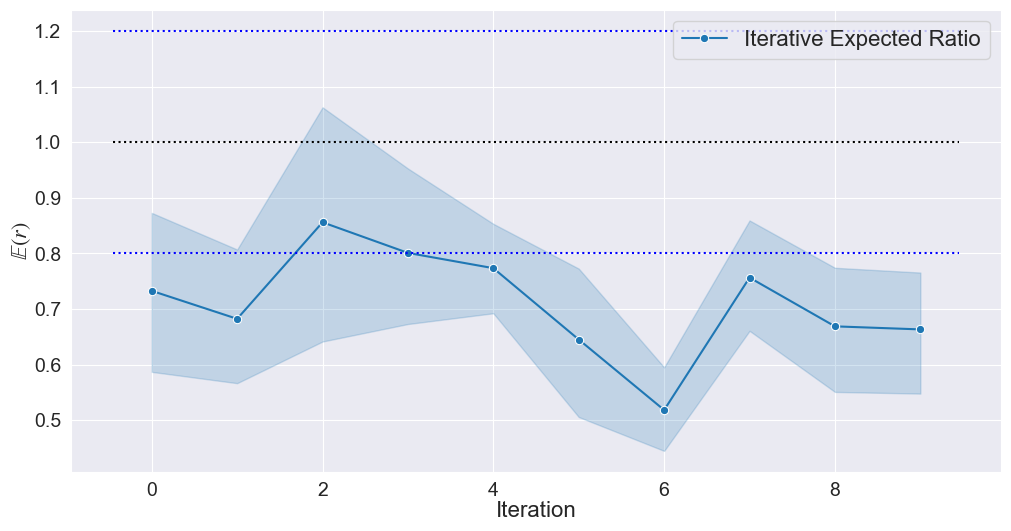

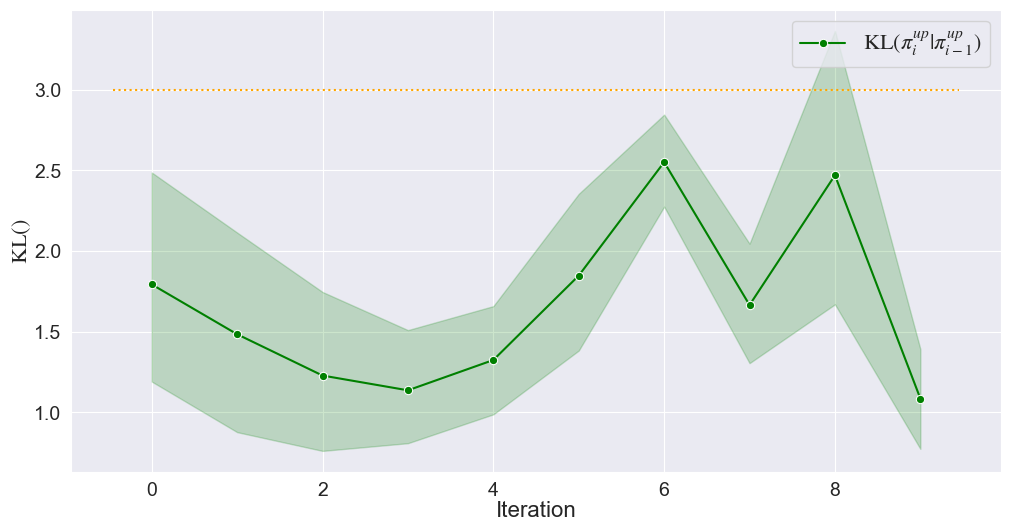

In [8]:
full_prob.e_r_plot(e_r_thresh=0.2), full_prob.kl_plot(kl_thresh=3.0)

(None, <Axes: xlabel='Iteration', ylabel='$\\mathrm{KL}()$'>)

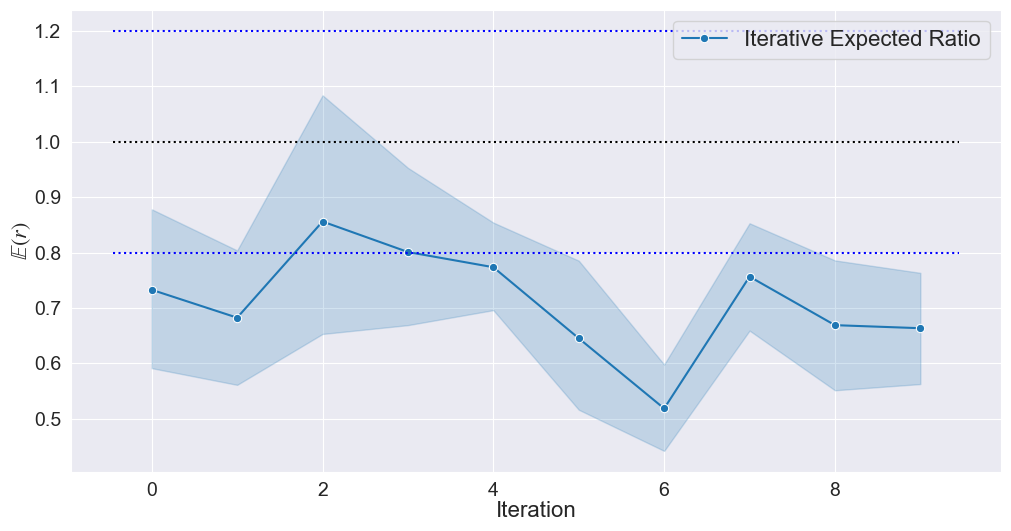

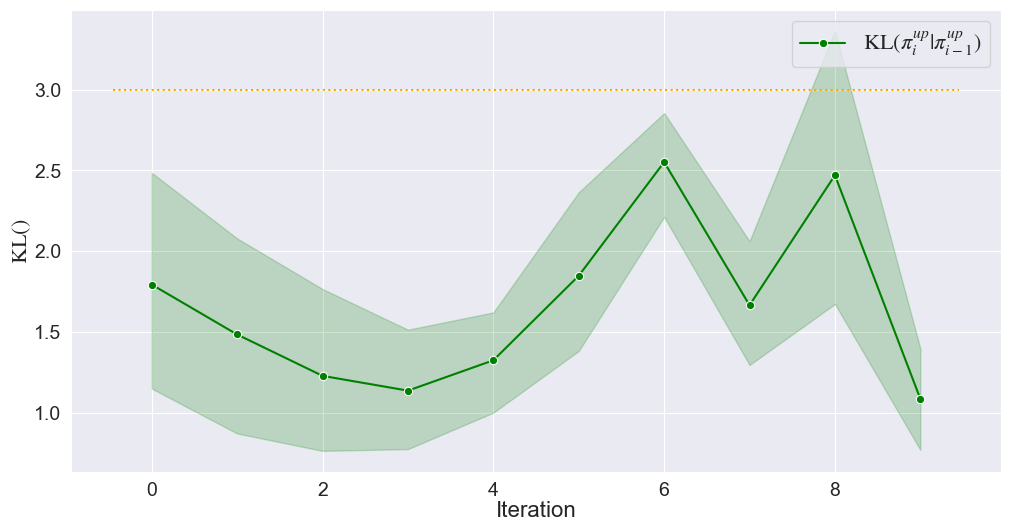

In [9]:
full_prob.e_r_plot(e_r_thresh=0.2), full_prob.kl_plot(kl_thresh=3.0)

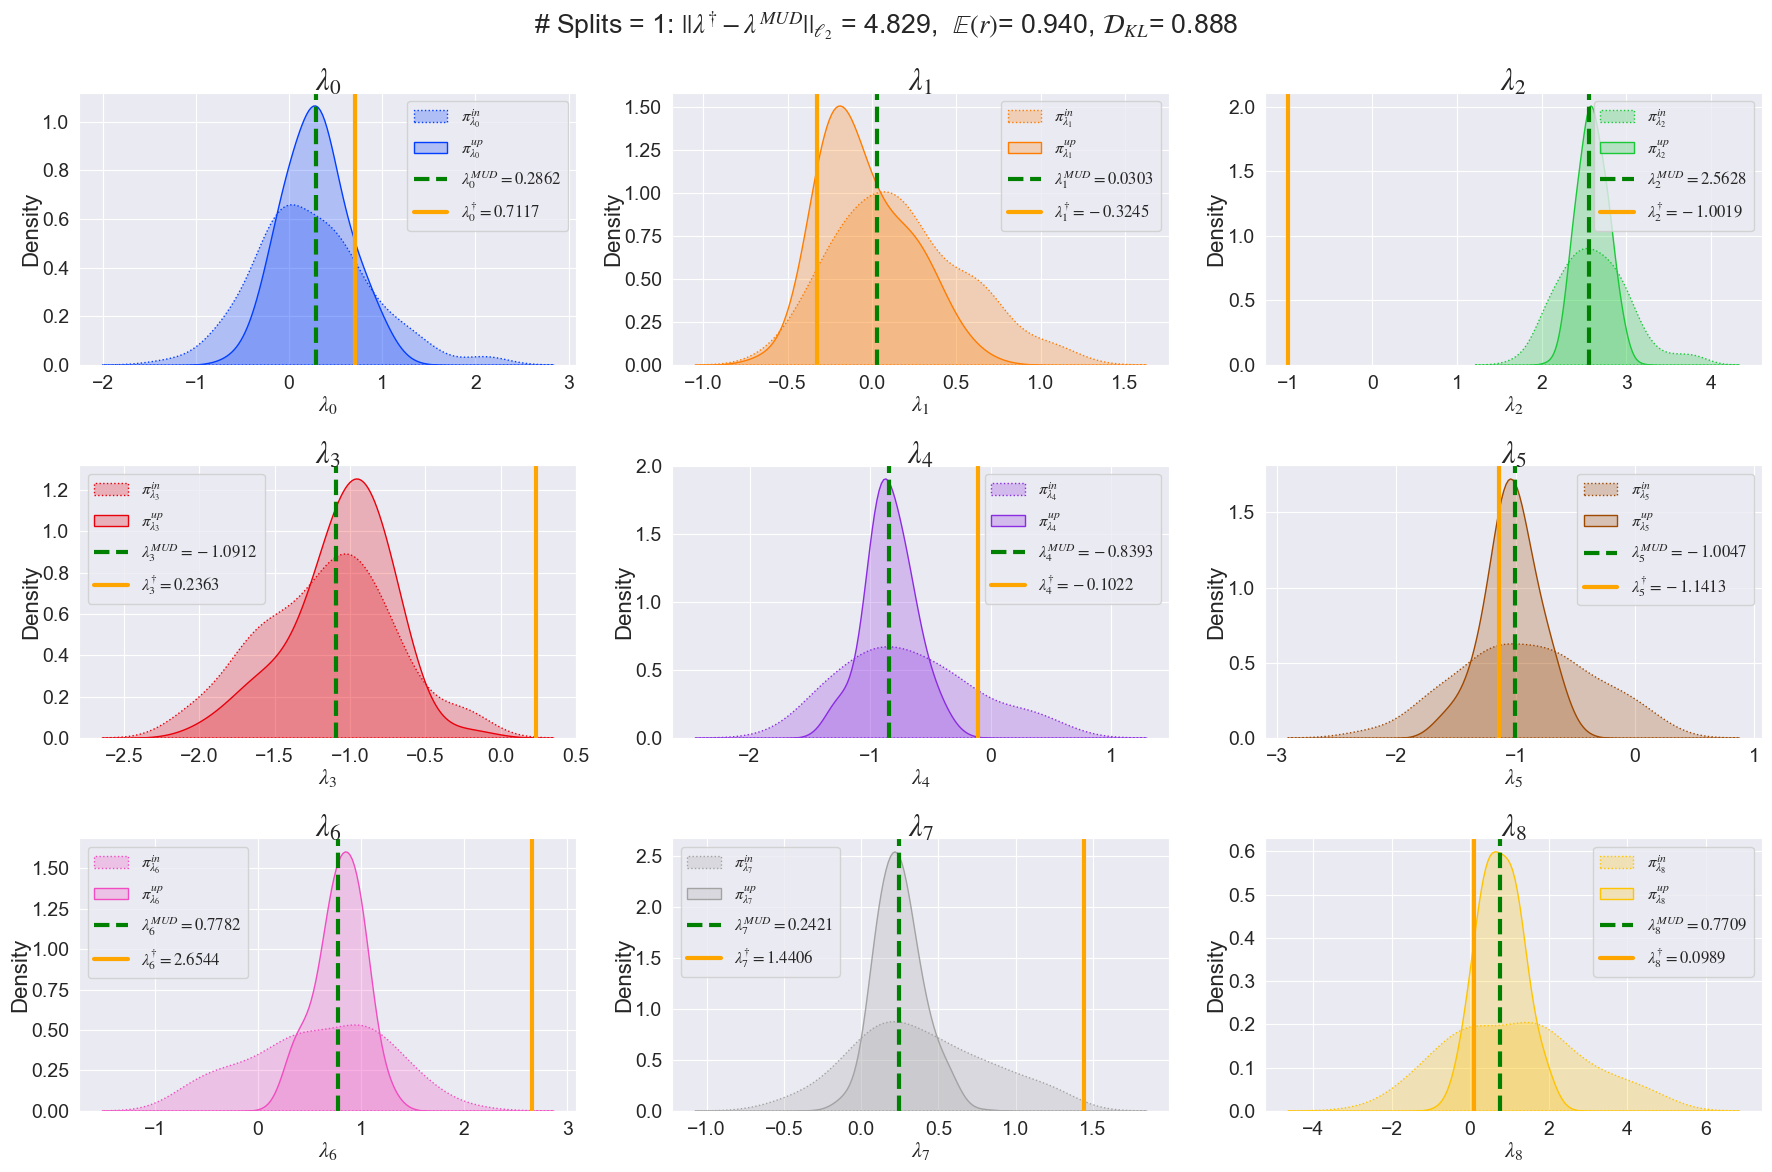

In [10]:
full_prob.best.param_density_plots(lam_true=hm.lam_true)

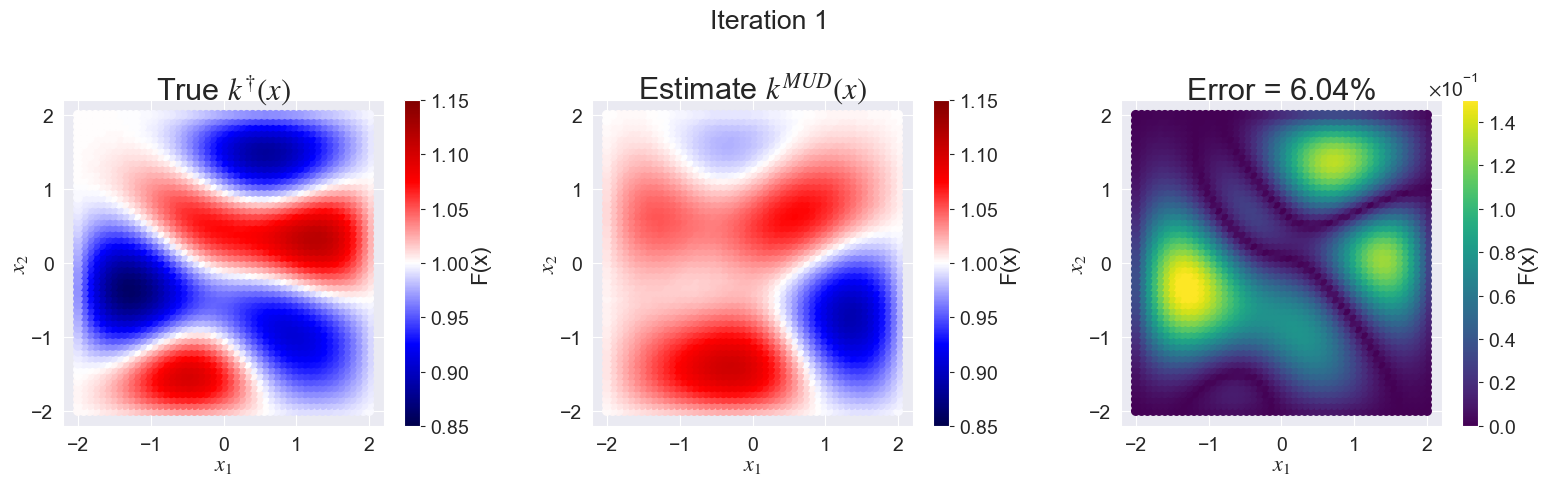

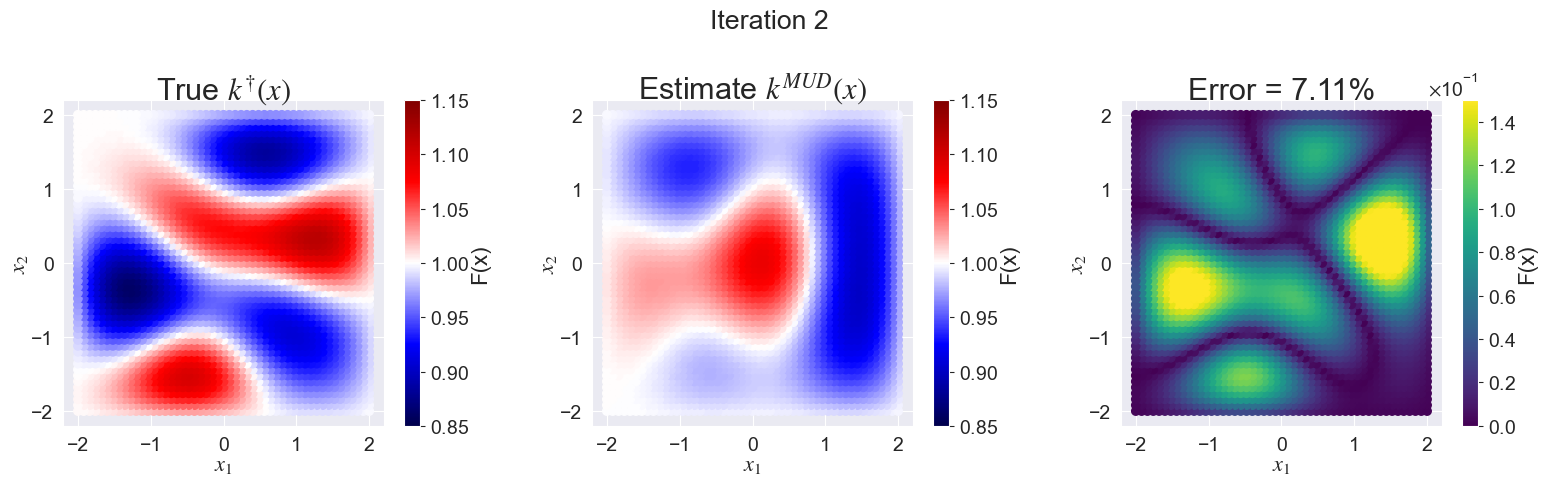

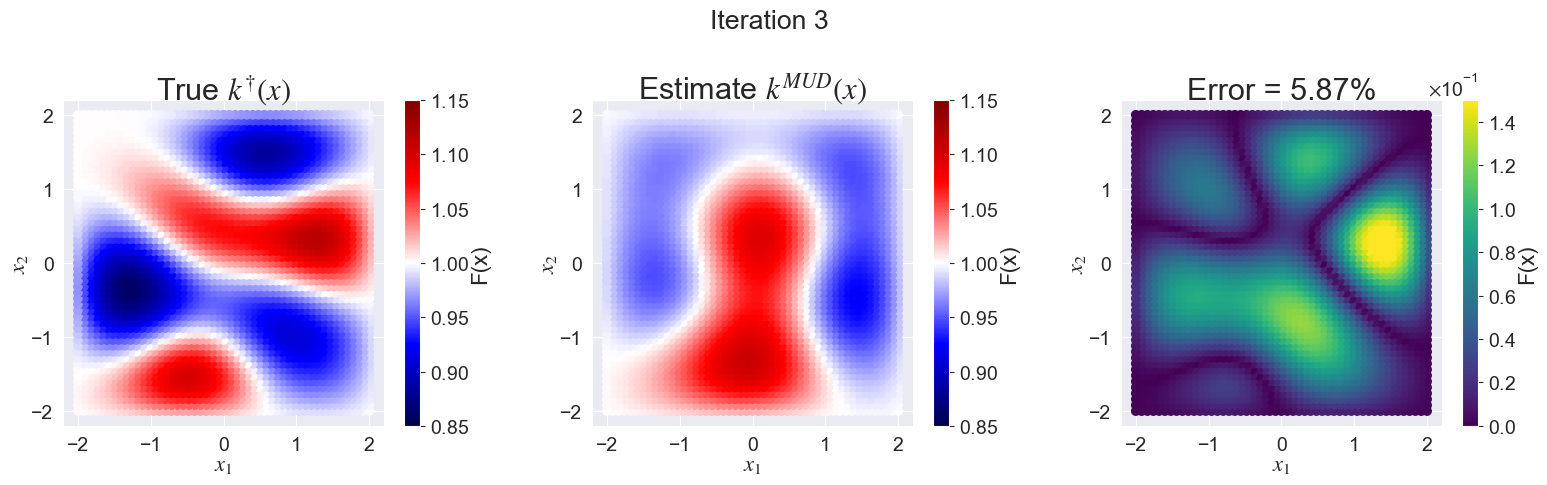

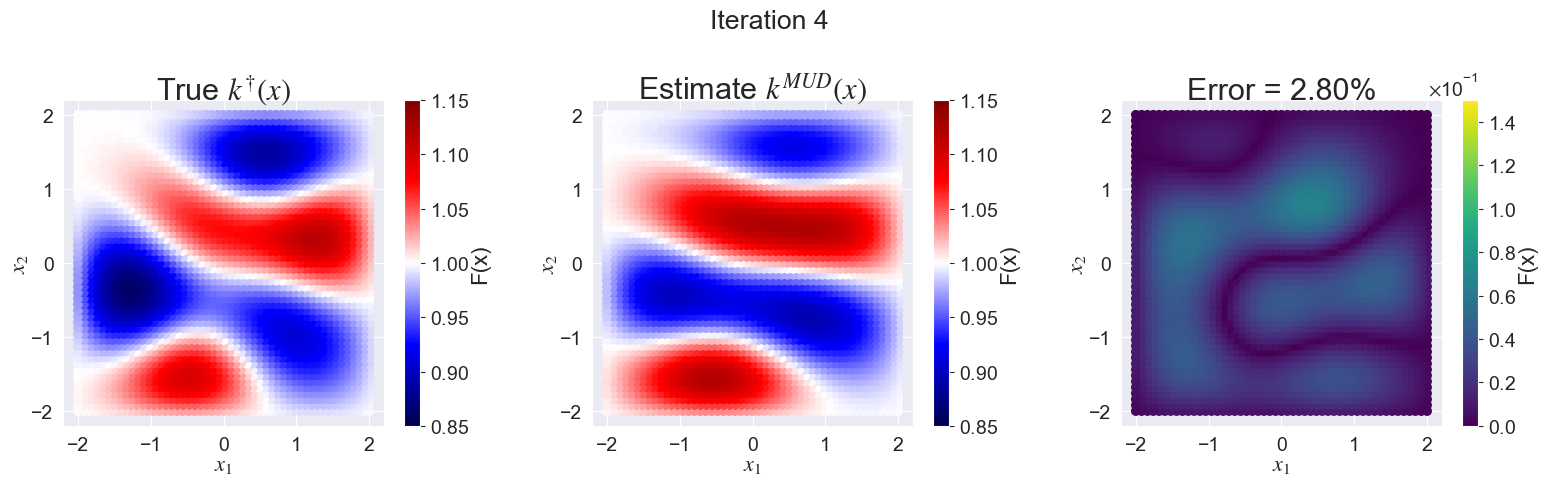

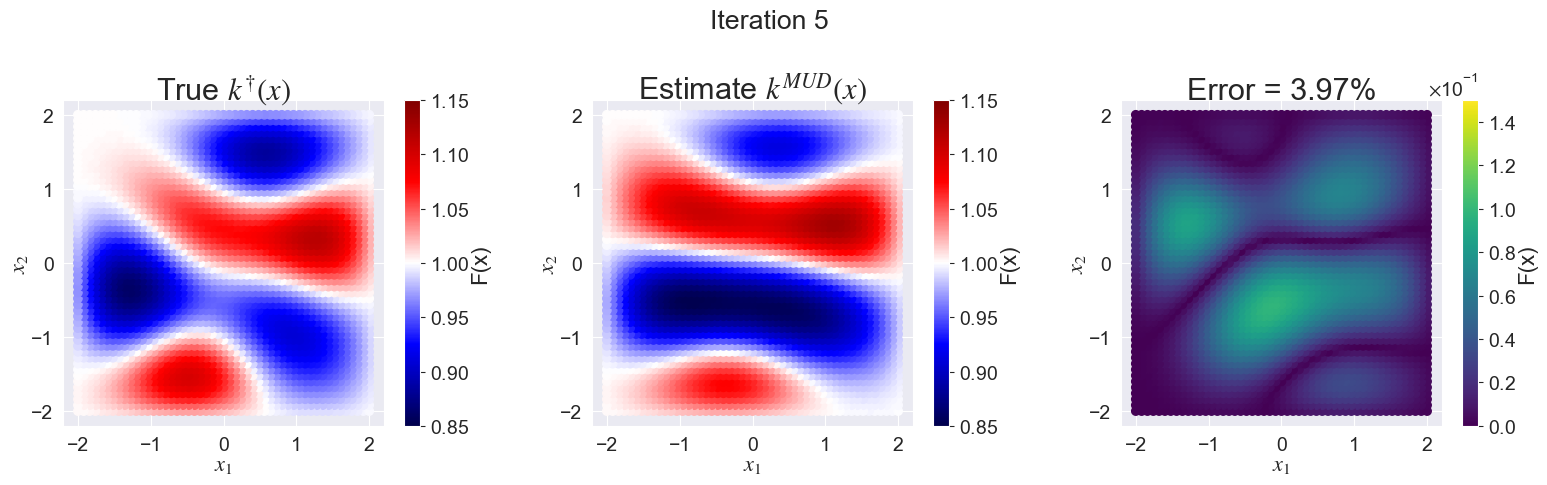

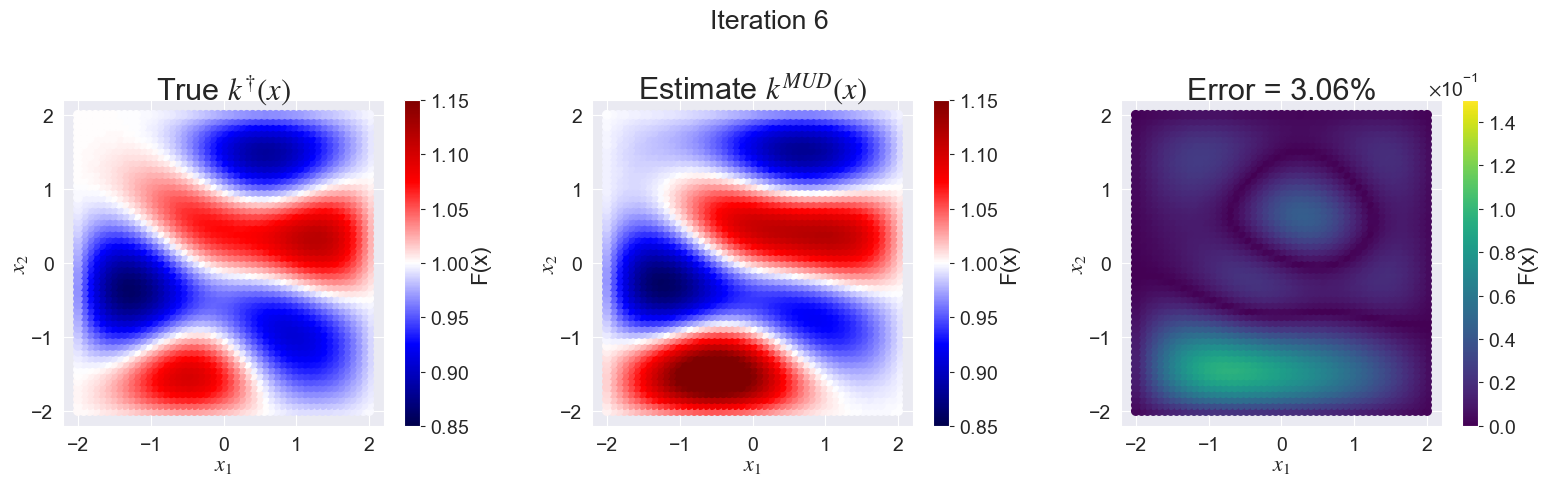

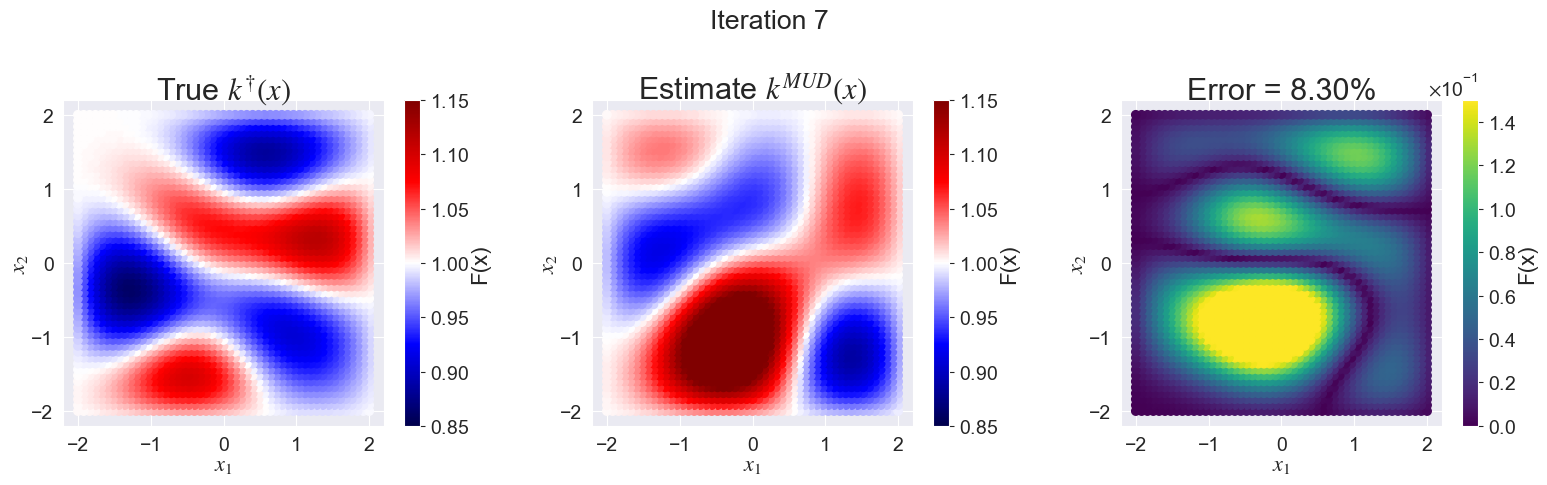

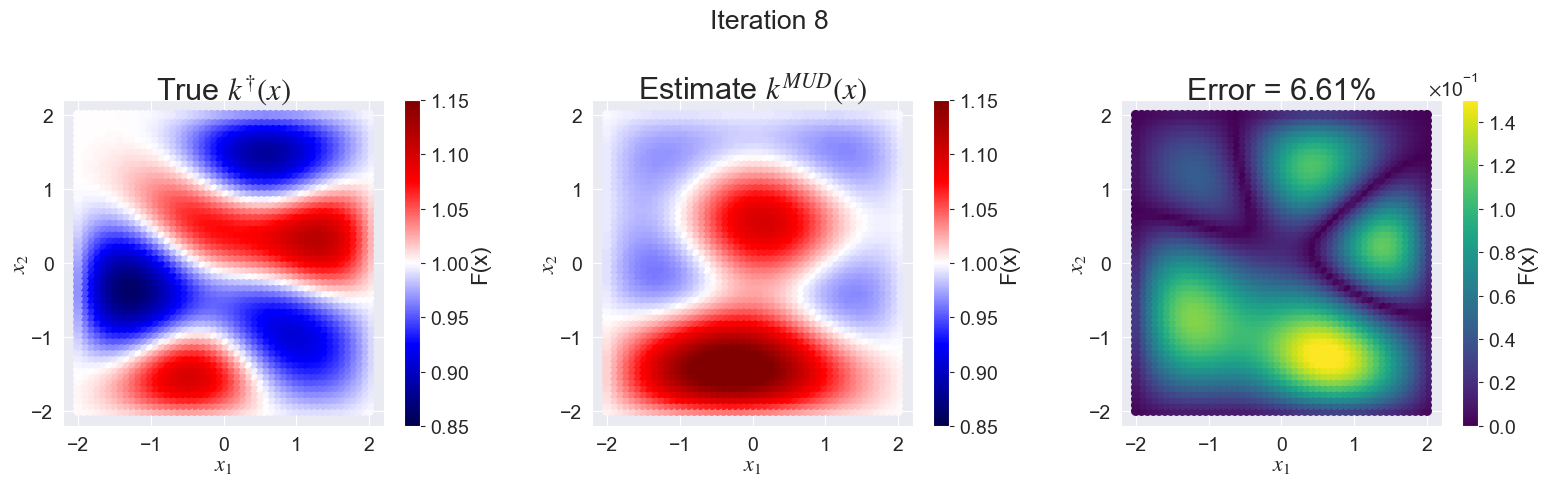

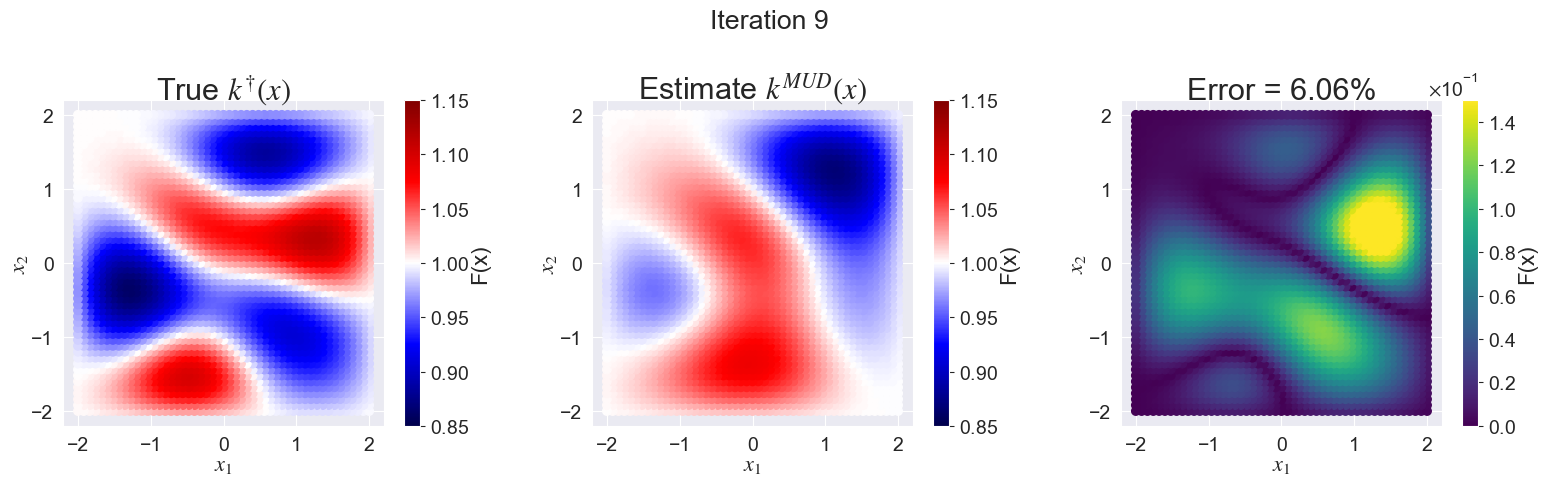

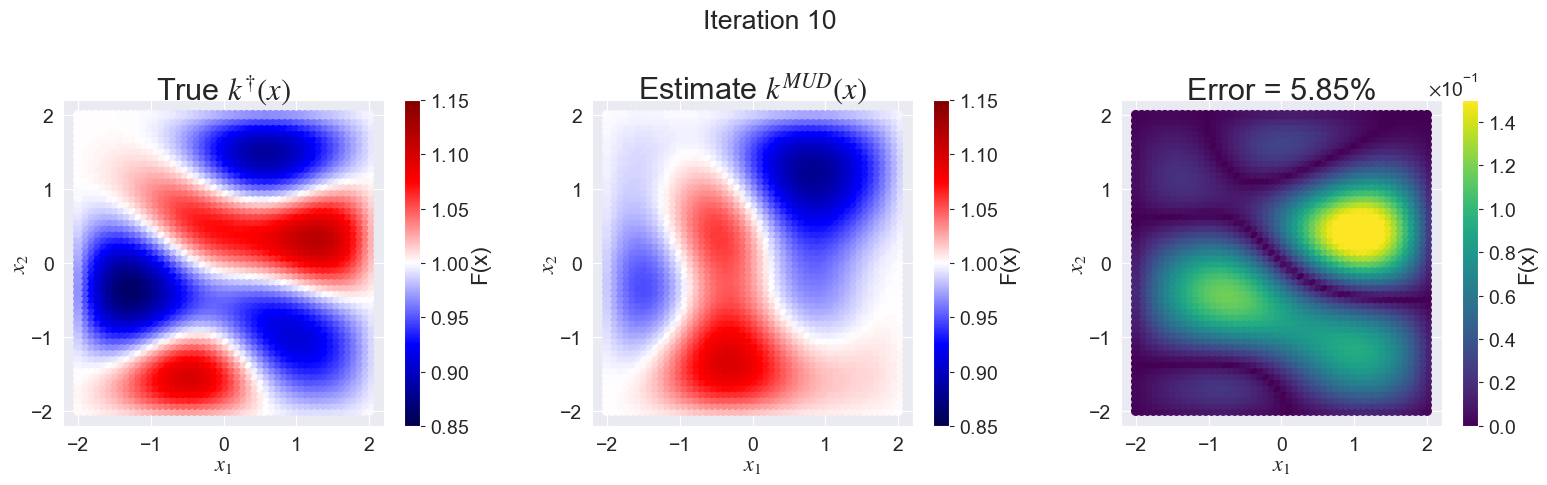

In [17]:
true_field = hm.reconstruct(hm.lam_true)
for i, p in enumerate(full_prob.probs):
    fig, ax = plt.subplots(1, 3, figsize=(16, 5))


    mud_point = p.best.get_mud_point()[1][0]
    mud_field = hm.reconstruct(mud_point)
    error = np.linalg.norm(true_field - mud_field) / np.linalg.norm(true_field)

    hm.plot_field(ax=ax[0], vmin=0.85, vmax=1.15)
    ax[0].set_title("True $k^{\dagger}(x)$")
    hm.plot_field(field=mud_point, ax=ax[1], vmin=0.85, vmax=1.15)
    ax[1].set_title("Estimate $k^{MUD}(x)$")
    hm.plot_field(diff=mud_point, ax=ax[2], vmin=0, vmax=0.15)
    ax[2].set_title("Error = {:.2f}%".format(error * 100))

    fig.suptitle(f'Iteration {i + 1}')

    fig.tight_layout()

In [15]:
prob.probs[7].full_search_results

e_r        kl  k_eff  k_eff_up  solved  \
0  0.692580  2.223738   1.00      0.54   False   
0  0.710564  1.763889   1.00      0.74   False   
0  0.802992  1.080875   1.00      0.96    True   
0  0.972878  0.982872   0.96      0.73    True   
0  0.790756  1.293452   0.73      0.69   False   
0  0.909014  1.267321   1.00      0.98    True   
0  1.013018  1.323322   0.98      0.86    True   
0  0.794986  0.508606   0.86      0.74   False   
0  0.907890  0.837279   1.00      1.00    True   
0  1.033208  0.989978   1.00      0.93    True   
0  1.009465  0.096759   0.93      0.87    True   
0  0.747438  0.456228   0.87      0.76   False   
0  0.946150  0.680194   1.00      1.00    True   
0  0.987521  0.711902   1.00      0.98    True   
0  0.920333  0.426561   0.98      0.87    True   
0  0.673551  1.717610   0.87      0.78   False   
0  1.027467  0.438137   1.00      1.00    True   
0  0.968957  1.349641   1.00      0.98    True   
0  0.940156  1.518526   0.98      0.94    True   
0  0.634096  1.215487   0.94      0.87   False   
0  0.979016  0.531900   1.00      1.00    True   
0  0.948848  1.275571   1.00      0.98    True   
0  0.888717  2.073682   0.98      0.95    True   
0  0.880355  0.150070   0.95      0.94    True   
0  0.714291  0.862982   0.94      0.90   False   
0  0.946739  1.056617   1.00      1.00    True   
0  1.015494  0.563183   1.00      1.00    True   
0  0.724861  1.201520   1.00      0.99   False   
0  0.826818  3.427384   1.00      0.33    True   
0  0.745351  2.774827   1.00      0.63   False   
0  0.685776  2.060787   1.00      0.90   False   
0  0.759618  1.855329   1.00      0.97   False   
0  0.799650  1.368457   1.00      1.00   False   
0  0.899849  1.126283   1.00      1.00    True   
0  1.205380  0.946398   1.00      0.94   False   
0  1.083953  0.507510   1.00      1.00    True   
0  0.650340  1.926733   1.00      0.97   False   
0  0.939433  1.084894   1.00      1.00    True   
0  0.920208  2.337711   1.00      0.97    True   
0  0.214118  3.284304   0.97      0.74   False   
0  0.943627  1.125731   1.00      1.00    True   
0  0.956545  1.128962   1.00      1.00    True   
0  1.246750  1.097576   1.00      0.95   False   

                                               error  lam_MUD_0  lam_MUD_1  \
0  Failed to solve problem on iteration 1 - |E(r)...  -0.734078  -0.417131   
0  Failed to solve problem on iteration 1 - |E(r)...  -0.734078  -0.417131   
0                                               None  -0.734078  -0.417131   
0                                               None  -0.706527  -0.462281   
0  Failed to solve problem on iteration 3 - |E(r)...  -0.706527  -0.462281   
0                                               None  -1.501057  -0.728521   
0                                               None   0.452036  -0.707311   
0  Failed to solve problem on iteration 3 - |E(r)...   0.452036  -0.707311   
0                                               None  -0.019760  -1.620378   
0                                               None   0.452036  -0.707311   
0                                               None   0.452036  -0.707311   
0  Failed to solve problem on iteration 4 - |E(r)...   0.452036  -0.707311   
0                                               None  -0.372285  -1.024318   
0                                               None  -2.079085  -0.891305   
0                                               None  -0.734078  -0.417131   
0  Failed to solve problem on iteration 4 - |E(r)...  -0.734078  -0.417131   
0                                               None  -2.708140  -0.378201   
0                                               None   0.058197  -1.747421   
0                                               None   0.102316   0.921136   
0  Failed to solve problem on iteration 4 - |E(r)...   0.102316   0.921136   
0                                               None   0.415887  -0.512645   
0                                               None   0.415887  -0.512645   
0            

## Saving results

In [18]:
import pandas as pd

save_search_results = True
save_states = True

def add_prob(ms, p, suffix, save_sub_states=True):
    """
    merge a problem's state to the samples dataframe.
    """
    cols_to_copy = [c for c in p.state.columns
                    if not c.startswith('q_lam_')
                    and not c.startswith('lam_')]

    ms = pd.merge(
        ms,
        p.state[cols_to_copy].copy().add_suffix(f'_{suffix}_{i}'),
        left_index=True,
        right_index=True,
        how='inner'
    )

    if save_sub_states:
        for j, state in p.states.groupby('iteration'):
            ms = pd.merge(
                ms,
                state[cols_to_copy].copy().add_suffix(f'_{suffix}_{i}_state_{j}'),
                left_index=True, right_index=True, how='inner')
    
    return ms

results = []
to_concat = []
for i, samples_df in enumerate(full_prob.model.samples):

    merged_samples = add_prob(samples_df.copy(), prob.probs[i].best, 'best', save_sub_states=save_states)
    if save_search_results:
        # * Loop through each sequential search problem at each iteration of the solve
        for j, p in enumerate(prob.probs[i].probs):
            merged_samples = add_prob(merged_samples, p, f'search_{j}', save_sub_states=save_states)

    results.append(prob.probs[i].full_search_results.copy())
    to_concat.append(merged_samples)

full_state = pd.concat(to_concat, keys=[f"{i}" for i in range(len(to_concat))])
results = pd.concat(results, keys=[f"{i}" for i in range(len(to_concat))])

In [19]:
prob.model.solver_params = solver_params
prob.model.full_state = full_state
prob.model.online_results = results 
prob.model.save('hm_10-its_solution.h5')

your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->values] [items->None]

  store.put("__attrs__", pd.Series(info_dict))



In [20]:
results

e_r        kl  k_eff  k_eff_up  solved  \
0 0  1.058571  1.819975   1.00      0.65    True   
  0  0.741669  2.787553   1.00      0.81   False   
  0  0.891363  1.802259   1.00      0.91    True   
  0  0.915711  0.949225   0.91      0.72    True   
  0  1.067550  0.254806   0.72      0.68    True   
..        ...       ...    ...       ...     ...   
9 0  0.415281  0.749637   1.00      1.00   False   
  0  1.068538  0.156048   1.00      1.00    True   
  0  0.692501  0.292046   1.00      1.00   False   
  0  0.880381  0.897605   1.00      1.00    True   
  0  0.227961  1.262386   1.00      1.00   False   

                                                 error  lam_MUD_0  lam_MUD_1  \
0 0                                               None  -1.257815   1.293018   
  0  Failed to solve problem on iteration 1 - |E(r)...  -1.257815   1.293018   
  0                                               None  -1.257815   1.293018   
  0                                               None   0.520605   2.861975   
  0                                               None   0.520605   2.861975   
..                                                 ...        ...        ...   
9 0  Failed to solve problem on iteration 2 - |E(r)...   0.518925  -0.187109   
  0                                               None  -0.741056  -0.059983   
  0  Failed to solve problem on iteration 2 - |E(r)...   0.518925  -0.187109   
  0                                               None  -0.555482  -0.436816   
  0  Failed to solve problem on iteration 2 - |E(r)...   0.997386   0.156924   

     lam_MUD_2  lam_MUD_3  ...           pca_mask  i  I  search_index  \
0 0   0.560762   1.706771  ...     range(0, 5500)  1  1             0   
  0   0.560762   1.706771  ...     range(0, 2750)  1  2             1   
  0   0.560762   1.706771  ...     range(0, 1834)  1  3             2   
  0  -0.484331   1.088259  ...  range(1834, 3667)  2  3             2   
  0  -0.484331   1.088259  ...  range(3667, 5500)  3  3             2   
..         ...        ...  ...                ... .. ..           ...   
9 0   2.479218  -1.496290  ...   range(786, 1572)  2  7            15   
  0   2.099039  -1.419368  ...      range(0, 688)  1  8            16   
  0   2.479218  -1.496290  ...   range(688, 1376)  2  8            16   
  0   1.893681  -1.810252  ...      range(0, 612)  1  9            17   
  0   2.919584  -1.821302  ...   range(612, 1223)  2  9            17   

     predict_delta  within_thresh  valid closest max_kl  min_kl  
0 0       0.058571           True   True   False  False   False  
  0       0.258331           True  False   False  False   False  
  0       0.108637           True   True   False  False   False  
  0       0.084289           True   True   False  False   False  
  0       0.067550           True   True   False  False   False  
..             ...            ...    ...     ...    ...     ...  
9 0       0.584719          False  False   False  False   False  
  0       0.068538           True   True   False  False   False  
  0       0.307499           True  False   False  False   False  
  0       0.119619           True   True   False   True   False  
  0       0.772039          False  False   False  False   False  

[490 rows x 28 columns]

# Loading Previous Solve

Code demonstrating how to load existing data from previous solve stored in a model state dataframe.

A heat model loaded state will contain the following:

    1. Observation data frame = '/data'
    2. Samples data frame = '/samples'

If results from an online solve have been added to the 

    3. Full results from online solves = '/online_results':

        a. Column with metrics such as e_r, kl, MUD point, predict delta
        b. Columns identifying solve params used = pca_mask, pca_components, etc.
        c. Columns identifying decisions made - closest, max_kl, etc.
        d. Rows are expanded over all solves tried and all sub-iterations within each of those solves tried in each iteration
    4. States from online skolve = '/full_state'
        a. Columns 

In [2]:
set_seed(2023)
load_args = heat_model_args.copy()
load_args['model_file'] = 'hm_patched.h5'  # 'hm_10_solution.h5'
hm = HeatModel(**load_args)
hm.lam_true

[08/18/23 15:38:37] INFO     Loading model state from state file at                                    ]8;id=531617;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=225341;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#197\197]8;;\
                             /Users/carlos/repos/pyDCI/notebooks/Examples/hm_patched.h5                            

[08/18/23 15:38:40] DEBUG    type(/__attrs__) = <class 'tables.group.Group'>                           ]8;id=285983;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=947163;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#201\201]8;;\
                              ?= DataframeDF -> False                                                              
                              ? = Series -> True                                                                   
                              ? = dict -> False                                                                    

[08/18/23 15:38:48] DEBUG    type(/data) = <class 'tables.group.Group'>                                ]8;id=145581;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=295967;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#201\201]8;;\
                              ?= DataframeDF -> True                                                               
                              ? = Series -> False                                                                  
                              ? = dict -> False                                                                    

[08/18/23 15:38:53] DEBUG    DF: /data:[    ts  shift_idx  sample_flag  lam_true_0  q_lam_true_0       ]8;id=390314;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=188510;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#212\212]8;;\
                             q_lam_true_1  \                                                                       
                             0  0.0          0         True    0.711674  2.037954e-17  4.248354e-18                
                                                                                                                   
                                q_lam_true_2  q_lam_true_3  q_lam_true_4  q_lam_true_5  ...                        
                             q_lam_obs_490  \                                                                      
                             0  2.037954e-17  9.776158e-17  9.170085e-17  9.170085e-17  ...                        
                             -0.027544                                                                             
                                                                                                                   
                                q_lam_obs_491  q_lam_obs_492  q_lam_obs_493  q_lam_obs_494                         
                             q_lam_obs_495  \                                                                      
                             0      -0.010171       0.027287       0.007231      -0.060942                         
                             -0.078775                                                                             
                                                                                                                   
                                q_lam_obs_496  q_lam_obs_497  q_lam_obs_498  q_lam_obs_499                         
                             0       0.011469      -0.047923      -0.015683       0.030213                         
                                                                                                                   
                             [1 rows x 3105 columns],     ts  shift_idx  sample_flag  lam_true_0                   
                             q_lam_true_0  q_lam_true_1  \                                                         
                             0  0.5          0         True    0.711674           0.0           0.0                
                                                                                                                   
                                q_lam_true_2  q_lam_true_3  q_lam_true_4  q_lam_true_5  ...                        
                             q_lam_obs_490  \                                                                      
                             0           0.0     -0.080032           0.0           0.0  ...                        
                             0.109423                                                                              
                                                                                                                   
                                q_lam_obs_491  q_lam_obs_492  q_lam_obs_493  q_lam_obs_494                         
                             q_lam_obs_495  \                                                                      
                             0       0.095954       0.100262       0.199346       0.127089                         
                             0.129837                                                                              
                                                                                                                   
                                q_lam_obs_496  q_lam_obs_497  q_lam_obs_498  q_lam_obs_499                         
                             0       0.097486       0.038954       0.111231      -0.040208                         
                    

[08/18/23 15:38:55] DEBUG    type(/samples) = <class 'tables.group.Group'>                             ]8;id=242694;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=345868;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#201\201]8;;\
                              ?= DataframeDF -> True                                                               
                              ? = Series -> False                                                                  
                              ? = dict -> False                                                                    

                    DEBUG    DF: /samples:[      lam_0    lam_1    lam_2     lam_3     lam_4     lam_5 ]8;id=341455;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=643768;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#212\212]8;;\
                             lam_6  \                                                                              
                             0  0.902777  0.98049  1.60004 -1.830969  0.905675 -2.043585 -0.850246                 
                                                                                                                   
                                   lam_7     lam_8     lam_9  ...  q_lam_5491  q_lam_5492  q_lam_5493              
                             \                                                                                     
                             0  1.455357  0.260101 -1.082954  ...    0.114064         0.0    0.130796              
                                                                                                                   
                                q_lam_5494  q_lam_5495  q_lam_5496  q_lam_5497  q_lam_5498  q_lam_5499             
                             \                                                                                     
                             0    0.100154    0.141553     0.10865         0.0    0.080298         0.0             
                                                                                                                   
                                best_flag                                                                          
                             0      False                                                                          
                                                                                                                   
                             [1 rows x 5511 columns],       lam_0     lam_1    lam_2     lam_3   lam_4             
                             lam_5     lam_6    lam_7  \                                                           
                             0 -0.173528  1.170642 -1.19266 -2.016192 -1.2191  2.192838  1.435271                  
                             1.91499                                                                               
                                                                                                                   
                                   lam_8     lam_9  ...  q_lam_5491  q_lam_5492  q_lam_5493                        
                             q_lam_5494  \                                                                         
                             0 -1.340303 -0.882832  ...    0.904627         0.0    0.789272                        
                             0.355111                                                                              
                                                                                                                   
                                q_lam_5495  q_lam_5496  q_lam_5497  q_lam_5498  q_lam_5499  best_flag              
                             0    0.485288    0.289961         0.0    0.176769         0.0      False              
                                                                                                                   
                             [1 rows x 5511 columns]]                                                              

                    DEBUG    type(/samples_xf) = <class 'tables.group.Group'>                          ]8;id=740279;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=90002;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#201\201]8;;\
                              ?= DataframeDF -> True                                                               
                              ? = Series -> False                                                                  
                              ? = dict -> False                                                                    

                    DEBUG    DF: /samples_xf:[   0     1     2         3     4     5         6         ]8;id=878480;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=507057;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#212\212]8;;\
                             7     8     9     \                                                                   
                             0   0.0   0.0   0.0 -0.079867   0.0   0.0 -0.107758 -0.102736   0.0   0.0             
                                                                                                                   
                                ...  2591      2592     2593  2594  2595      2596  2597  2598  2599               
                             2600                                                                                  
                             0  ...   0.0  0.103618  0.10865   0.0   0.0  0.080298   0.0   0.0   0.0               
                             0.0                                                                                   
                                                                                                                   
                             [1 rows x 2601 columns],    0     1     2         3     4     5         6             
                             7     8     9     \                                                                   
                             0   0.0   0.0   0.0 -0.178644   0.0   0.0 -0.293596 -0.290382   0.0   0.0             
                                                                                                                   
                                ...  2591      2592      2593  2594  2595      2596  2597  2598  2599              
                             2600                                                                                  
                             0  ...   0.0  0.286724  0.289961   0.0   0.0  0.176769   0.0   0.0   0.0              
                             0.0                                                                                   
                                                                                                                   
                             [1 rows x 2601 columns]]                                                              

[08/18/23 15:38:56] DEBUG    Setting info attributes of 18                                             ]8;id=549558;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=663595;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#221\221]8;;\

                    DEBUG    Setting attr coords to [[ 1.92 -2.  ]                                     ]8;id=492901;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=92418;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#223\223]8;;\
                              [ 2.   -2.  ]                                                                        
                              [ 2.   -1.92]                                                                        
                              ...                                                                                  
                              [-2.    1.92]                                                                        
                              [-1.92  2.  ]                                                                        
                              [-2.    2.  ]]                                                                       

                    DEBUG    Setting attr cov to [[0.04       0.02904596 0.0210917  ... 0.         0.  ]8;id=820059;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=461322;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#223\223]8;;\
                             0.        ]                                                                           
                              [0.02904596 0.04       0.02904596 ... 0.         0.         0.        ]              
                              [0.0210917  0.02904596 0.04       ... 0.         0.         0.        ]              
                              ...                                                                                  
                              [0.         0.         0.         ... 0.04       0.0210917  0.02904596]              
                              [0.         0.         0.         ... 0.0210917  0.04       0.02904596]              
                              [0.         0.         0.         ... 0.02904596 0.02904596 0.04      ]]             

                    DEBUG    Setting attr def_init to ['uniform', {'scale': 1.0}]                      ]8;id=297567;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=215789;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#223\223]8;;\

                    DEBUG    Setting attr full_state to          lam_0     lam_1     lam_2     lam_3   ]8;id=975512;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=635623;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#223\223]8;;\
                             lam_4     lam_5     lam_6  \                                                          
                             0 0   0.902777  0.980490  1.600040 -1.830969  0.905675 -2.043585                      
                             -0.850246                                                                             
                               1  -0.118708 -0.092447  0.693102 -0.288900 -0.056751  0.784476                      
                             -1.042492                                                                             
                               2  -1.294691  0.000800 -2.394093 -0.440840 -0.237559  0.104299                      
                             -0.090466                                                                             
                               3  -0.224987 -0.318096 -0.114412  1.292431  0.792476  1.848870                      
                             -0.956733                                                                             
                               4  -0.805359  1.672560 -1.928774  1.836009 -0.334832  0.976135                      
                             0.574535                                                                              
                             ...        ...       ...       ...       ...       ...       ...                      
                             ...                                                                                   
                             5 95  0.623725  0.608249 -2.218213 -0.031659 -0.034762  0.037096                      
                             1.554722                                                                              
                               96  0.436563  0.133719 -0.524643  0.793430 -1.313457 -0.546971                      
                             2.359990                                                                              
                               97  0.389874  1.953803 -3.946345 -1.272174  0.537270  0.315206                      
                             1.858835                                                                              
                               98  1.390114  0.062907 -0.768807  0.415884 -0.524702  0.105772                      
                             1.995922                                                                              
                               99  2.000886 -1.034181  0.275112  0.271335 -1.099856  0.986039                      
                             2.120436                                                                              
                                                                                                                   
                                      lam_7     lam_8     lam_9  ...  q_pca_2_search_17_5_state_3  \               
                             0 0   1.455357  0.260101 -1.082954  ...                          NaN                  
                               1   0.110872 -0.012422 -0.726591  ...                          NaN                  
                               2  -1.356193  0.605829  0.617137  ...                          NaN                  
                               3   1.939115  0.209058 -0.523991  ...                          NaN                  
                               4   2.736033 -3.332697 -0.728043  ...                          NaN                  
                             ...        ...       ...       ...  ...                          ...                  
                             5 95  1.071371 -1.364175 -4.047033  ...                     1.522580                  
                    

                    DEBUG    Setting attr lam_true to [ 0.71167353 -0.32448496 -1.00187064  0.23625079 ]8;id=913858;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=755485;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#223\223]8;;\
                             -0.10215984 -1.14129263                                                               
                               2.65440726  1.44060519  0.09890227 -3.12153215]                                     

                    DEBUG    Setting attr lscales to [0.1, 0.1]                                        ]8;id=104866;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=526934;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#223\223]8;;\

                    DEBUG    Setting attr mean to 1.0                                                  ]8;id=362080;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=687347;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#223\223]8;;\

                    DEBUG    Setting attr measurement_noise to 0.05                                    ]8;id=672334;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=853094;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#223\223]8;;\

                    DEBUG    Setting attr modes to (array([0.3905162 , 0.38726458, 0.38726458,         ]8;id=103653;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=984551;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#223\223]8;;\
                             0.38404004, 0.38190527,                                                               
                                    0.38190527, 0.37872536, 0.37872536, 0.3745266 , 0.3745266 ]),                  
                             array([[-2.60147751e-04, -7.17079142e-04,  1.27062885e-04, ...,                       
                                     -1.65945465e-03,  5.31090818e-04, -1.29275884e-03],                           
                                    [-1.52161416e-04, -4.21055014e-04,  7.31703278e-05, ...,                       
                                     -9.86852401e-04,  3.28614907e-04, -7.63296440e-04],                           
                                    [-2.60147751e-04, -7.17905667e-04,  1.22306687e-04, ...,                       
                                     -1.67412043e-03,  5.74063179e-04, -1.27425835e-03],                           
                                    ...,                                                                           
                                    [-2.60147751e-04,  7.17905667e-04, -1.22306687e-04, ...,                       
                                      1.67412043e-03, -5.74063179e-04,  1.27425835e-03],                           
                                    [-2.60147751e-04,  7.17079142e-04, -1.27062885e-04, ...,                       
                                      1.65945465e-03, -5.31090818e-04,  1.29275884e-03],                           
                                    [-1.52161416e-04,  4.21055014e-04, -7.31703278e-05, ...,                       
                                      9.86852401e-04, -3.28614907e-04,  7.63296440e-04]]))                         

                    DEBUG    Setting attr nmodes to 10                                                 ]8;id=220849;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=582310;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#223\223]8;;\

                    DEBUG    Setting attr nx to 50                                                     ]8;id=785385;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=935505;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#223\223]8;;\

                    DEBUG    Setting attr ny to 50                                                     ]8;id=528470;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=498694;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#223\223]8;;\

[08/18/23 15:38:57] DEBUG    Setting attr online_results to           e_r        kl  k_eff  k_eff_up   ]8;id=953562;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=531270;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#223\223]8;;\
                             solved  \                                                                             
                             0 0  1.058571  1.819975   1.00      0.65    True                                      
                               0  0.741669  2.787553   1.00      0.81   False                                      
                               0  0.891363  1.802259   1.00      0.91    True                                      
                               0  0.915711  0.949225   0.91      0.72    True                                      
                               0  1.067550  0.254806   0.72      0.68    True                                      
                             ..        ...       ...    ...       ...     ...                                      
                             5 0  0.906179  0.138338   1.00      1.00    True                                      
                               0  0.688088  2.317976   1.00      1.00   False                                      
                               0  1.048815  0.217030   1.00      1.00    True                                      
                               0  0.889936  0.355984   1.00      1.00    True                                      
                               0  0.704668  1.523764   1.00      1.00   False                                      
                                                                                                                   
                                                                              error  lam_MUD_0                     
                             lam_MUD_1  \                                                                          
                             0 0                                               None  -1.257815                     
                             1.293018                                                                              
                               0  Failed to solve problem on iteration 1 - |E(r)...  -1.257815                     
                             1.293018                                                                              
                               0                                               None  -1.257815                     
                             1.293018                                                                              
                               0                                               None   0.520605                     
                             2.861975                                                                              
                               0                                               None   0.520605                     
                             2.861975                                                                              
                             ..                                                 ...        ...                     
                             ...                                                                                   
                             5 0                                               None   1.700560                     
                             0.262562                                                                              
                               0  Failed to solve problem on iteration 3 - |E(r)...   0.624944                     
                             0.011813                                                                              
                               0                                               None   1.650941                     
                    

                    DEBUG    Setting attr sample_ts to 0.05                                            ]8;id=400988;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=896581;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#223\223]8;;\

                    DEBUG    Setting attr sd to 0.2                                                    ]8;id=923766;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=217482;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#223\223]8;;\

                    DEBUG    Setting attr solve_ts to 0.0001                                           ]8;id=469480;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=263402;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#223\223]8;;\

                    DEBUG    Setting attr state_idxs to [   5   12   24   25   30   37   38   43   55  ]8;id=483735;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=495263;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#223\223]8;;\
                             68   72   81   95   99                                                                
                               107  109  113  115  121  122  125  134  137  144  149  152  162  166                
                               167  168  187  190  191  193  196  217  219  221  224  225  226  227                
                               228  230  231  239  242  263  266  267  271  275  282  283  288  295                
                               298  301  319  320  324  327  330  336  339  343  345  350  352  353                
                               354  355  359  361  365  367  369  370  376  378  379  390  394  404                
                               406  408  411  414  420  421  422  432  433  443  445  448  455  457                
                               460  488  502  507  512  515  538  540  552  557  575  576  583  595                
                               608  613  614  618  619  622  627  629  640  648  657  658  662  665                
                               669  678  681  686  688  697  698  704  716  733  741  743  747  748                
                               749  754  761  776  781  791  799  803  806  807  812  814  816  818                
                               831  835  841  844  845  846  862  865  869  873  879  889  900  903                
                               921  924  925  928  929  935  937  939  942  944  948  956  961  962                
                               968  985  991 1002 1008 1022 1038 1044 1049 1050 1056 1067 1072 1079                
                              1080 1081 1085 1090 1095 1102 1107 1108 1127 1144 1145 1150 1167 1177                
                              1185 1187 1191 1207 1213 1215 1230 1236 1240 1250 1257 1267 1275 1277                
                              1284 1285 1286 1296 1297 1298 1300 1301 1311 1314 1320 1322 1324 1334                
                              1340 1344 1352 1354 1359 1362 1376 1379 1380 1382 1390 1401 1403 1404                
                              1411 1412 1413 1414 1439 1441 1443 1446 1447 1453 1469 1470 1472 1474                
                              1476 1479 1482 1499 1507 1508 1509 1510 1518 1520 1534 1535 1538 1544                
                              1547 1549 1560 1566 1570 1572 1574 1580 1583 1599 1606 1610 1619 1625                
                              1627 1628 1629 1637 1638 1640 1641 1644 1647 1654 1666 1668 1683 1686                
                              1687 1691 1692 1696 1697 1703 1705 1709 1722 1723 1726 1733 1745 1754                
                              1760 1763 1770 1776 1796 1802 1803 1804 1815 1823 1826 1828 1834 1840                
                              1843 1844 1848 1850 1851 1853 1854 1860 1862 1867 1870 1873 1877 1879                
                              1882 1891 1892 1895 1899 1903 1904 1906 1908 1909 1910 1915 1924 1928                
                              1931 1940 1943 1947 1951 1954 1956 1959 1960 1963 1965 1988 1989 1996                
                              2000 2007 2008 2013 2016 2018 2031 2044 2055 2059 2066 2073 2080 2091                
                              2100 2101 2102 2105 2108 2109 2118 2120 2133 2140 2151 2154 2159 2160                
                              2163 2169 2177 2185 2187 2197 2199 2200 2205 2209 2225 2228 2233 2235                
                              2238 2239 2246 2249 2255 2259 2260 2263 2264 2268 2269 2272 2275 2277                
                              2284 2286 2287 2288 2293 2300 2301 2302 2308 2309 2310 2313 2321 2325                
                    

                    DEBUG    Setting attr x0 to [2.03795444e-17 4.24835426e-18 2.03795444e-17 ...      ]8;id=908499;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=620976;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#223\223]8;;\
                             2.03795444e-17                                                                        
                              2.03795444e-17 4.24835426e-18]                                                       

                    DEBUG    Setting true_k_x to [ 0.71167353 -0.32448496 -1.00187064  0.23625079  ]8;id=649692;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=263957;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py#97\97]8;;\
                             -0.10215984 -1.14129263                                                               
                               2.65440726  1.44060519  0.09890227 -3.12153215] of type <class                      
                             'numpy.ndarray'>                                                                      

                    DEBUG    Setting up simulation                                                 ]8;id=382990;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=285830;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py#99\99]8;;\

                    DEBUG    KL modes already initialized                                         ]8;id=99455;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=781468;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py#226\226]8;;\

                    DEBUG    State idxs set at 500 of 2601 total indices                               ]8;id=351061;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=61777;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#100\100]8;;\

array([ 0.71167353, -0.32448496, -1.00187064,  0.23625079, -0.10215984,
       -1.14129263,  2.65440726,  1.44060519,  0.09890227, -3.12153215])

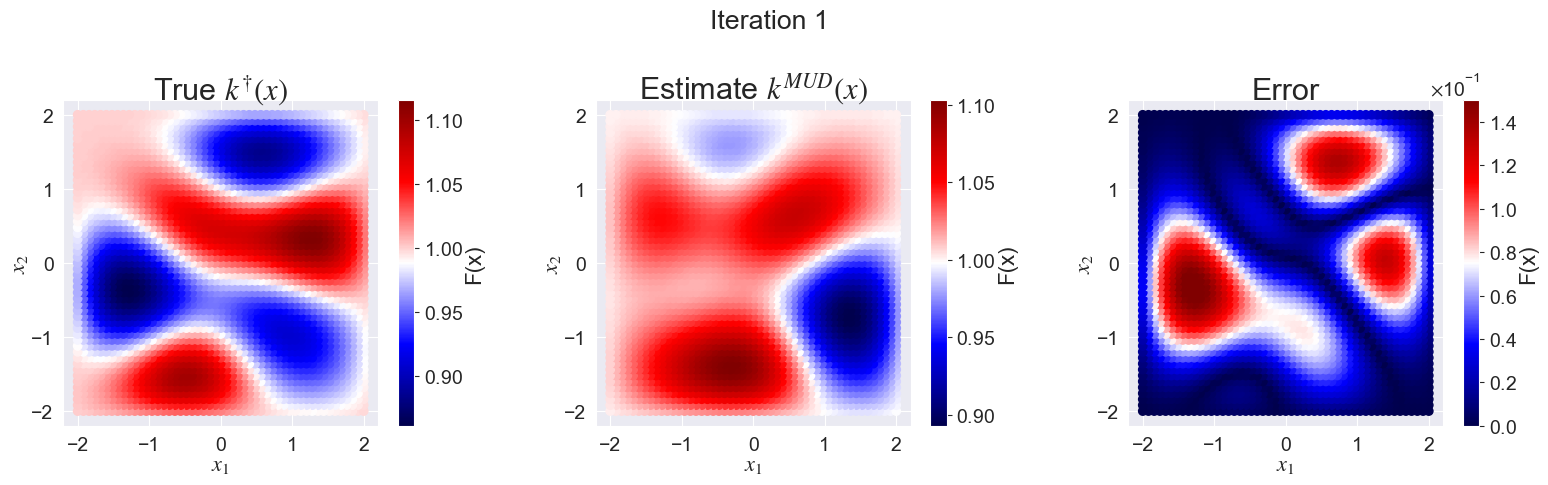

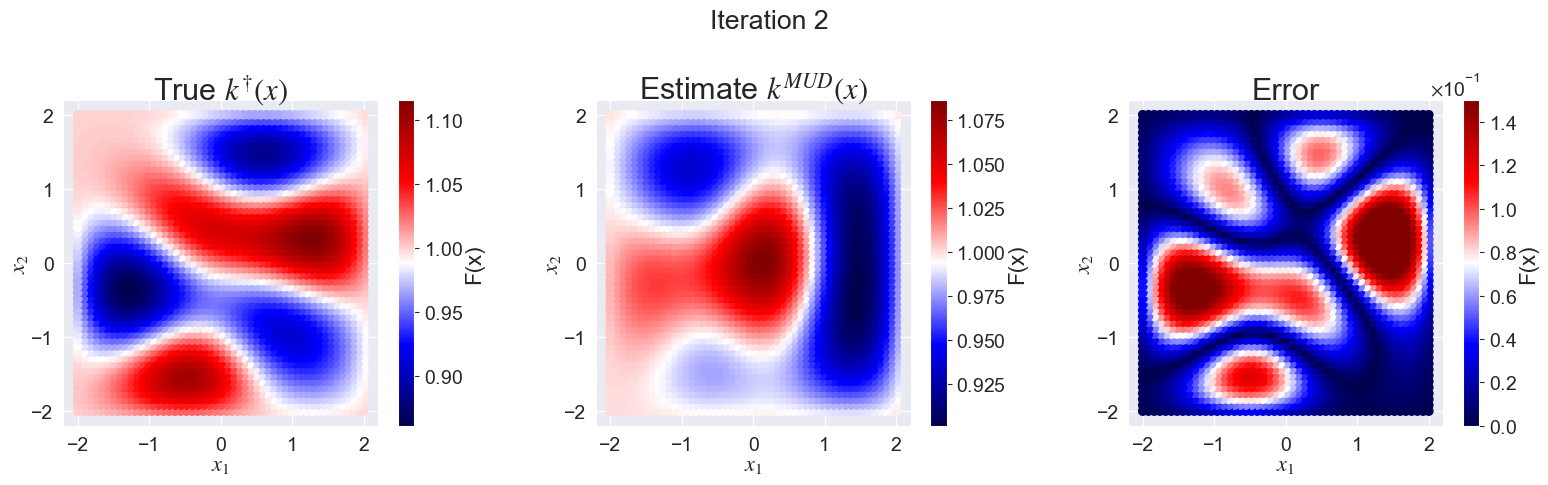

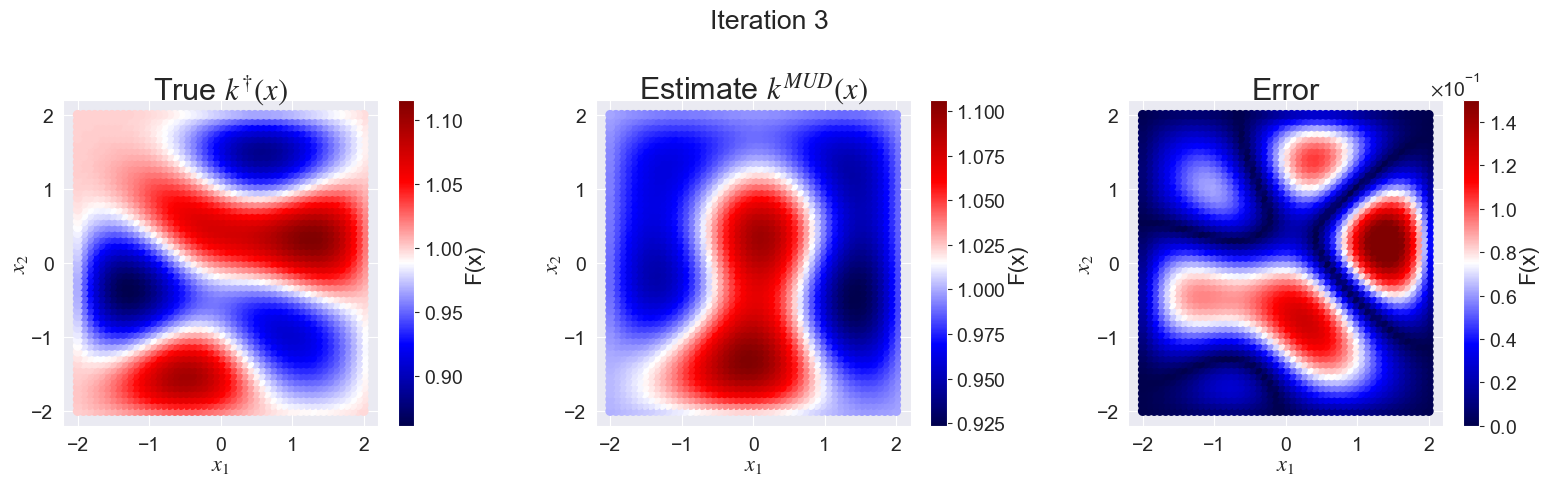

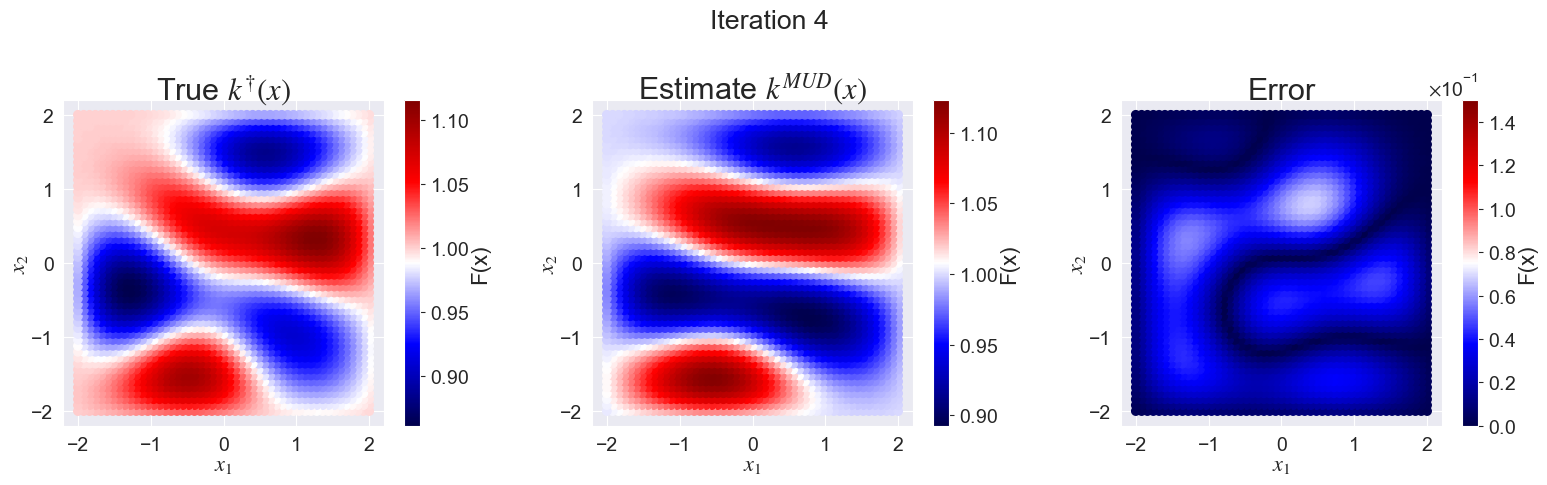

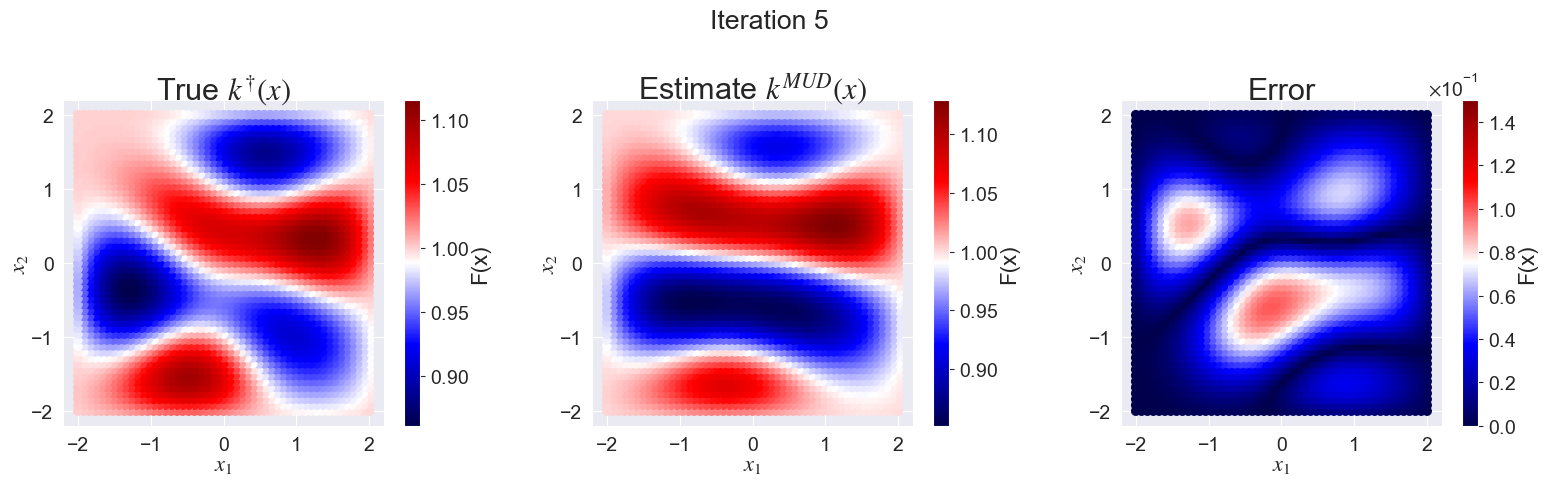

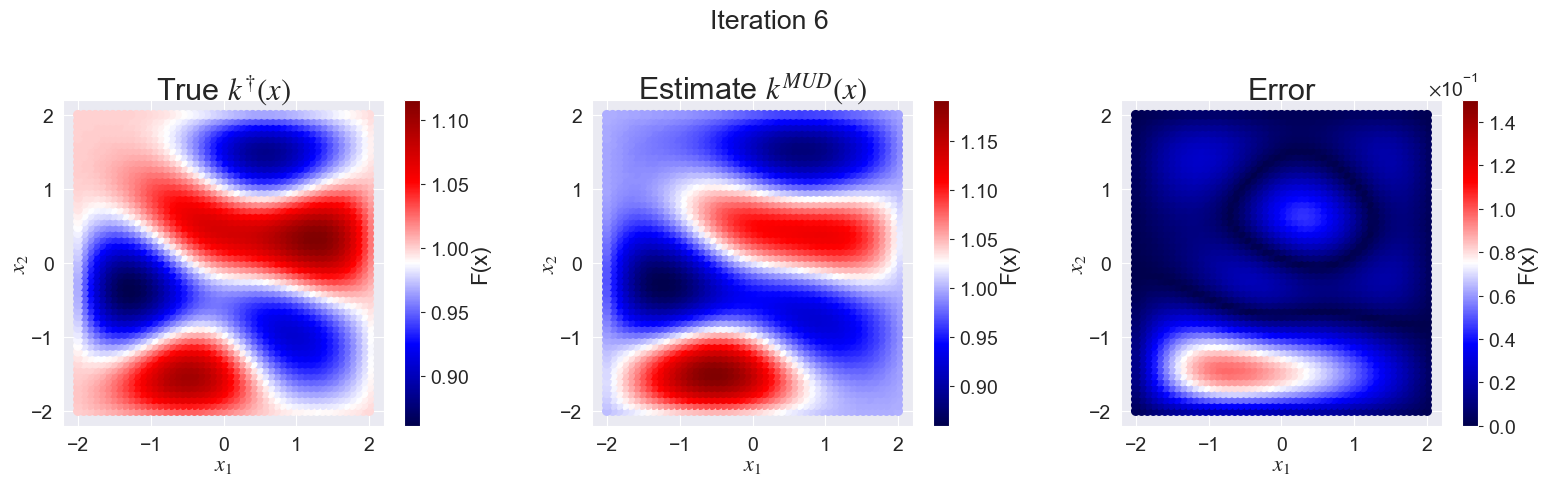

In [6]:
mud_points = get_df(hm.full_state[hm.full_state['best_flag']], 'lam', 10)
for i, mp in enumerate(mud_points):
    fig, ax = plt.subplots(1, 3, figsize=(16, 5))

    hm.plot_field(ax=ax[0])
    ax[0].set_title("True $k^{\dagger}(x)$")
    hm.plot_field(field=mp, ax=ax[1])
    ax[1].set_title("Estimate $k^{MUD}(x)$")
    hm.plot_field(diff=mp, ax=ax[2], relative_error=True, vmin=0, vmax=0.15)
    ax[2].set_title("Error")

    fig.suptitle(f'Iteration {i + 1}')

    fig.tight_layout()

In [125]:
result_groups = hm.online_results.groupby(level=0)

first_iteration_results = result_groups.get_group('0').dropna(axis=1)
first_iteration_results

e_r        kl  k_eff  k_eff_up  solved  lam_MUD_0  lam_MUD_1  \
0 0  1.058571  1.819975   1.00      0.65    True  -1.257815   1.293018   
  0  0.741669  2.787553   1.00      0.81   False  -1.257815   1.293018   
  0  0.891363  1.802259   1.00      0.91    True  -1.257815   1.293018   
  0  0.915711  0.949225   0.91      0.72    True   0.520605   2.861975   
  0  1.067550  0.254806   0.72      0.68    True   0.520605   2.861975   
  0  0.925159  1.176285   1.00      1.00    True  -1.257815   1.293018   
  0  0.926401  1.163498   1.00      0.91    True   0.520605   2.861975   
  0  1.067679  0.369135   0.91      0.76    True   0.520605   2.861975   
  0  1.086870  0.178547   0.76      0.74    True   0.520605   2.861975   
  0  0.946910  0.821352   1.00      1.00    True   1.215957  -0.418266   
  0  0.833390  1.239338   1.00      0.98    True  -1.257815   1.293018   
  0  1.104490  0.847416   0.98      0.76    True   0.520605   2.861975   
  0  0.836047  2.101730   0.76      0.60    True  -0.250845   0.664744   
  0  0.407932  1.515412   0.60      0.57   False   0.538543   0.872553   
  0  0.969193  0.358842   1.00      1.00    True   1.215957  -0.418266   
  0  0.743551  1.387061   1.00      0.96   False   0.520605   2.861975   
  0  0.929733  0.502097   1.00      1.00    True  -0.118708  -0.092447   
  0  0.935297  0.342006   1.00      1.00    True   0.520605   2.861975   
  0  0.999891  0.609852   1.00      0.94    True   0.520605   2.861975   
  0  0.944928  0.434255   0.94      0.89    True   0.520605   2.861975   
  0  1.075231  0.413796   0.89      0.73    True   0.520605   2.861975   
  0  0.323549  6.303217   0.73      0.81   False  -1.257815   1.293018   
  0  0.910382  0.589079   1.00      1.00    True  -0.701728  -0.921893   
  0  0.924530  0.741427   1.00      1.00    True  -0.470832   0.730065   
  0  1.059689  0.187413   1.00      1.00    True  -0.470832   0.730065   
  0  1.150689  0.291627   1.00      1.00    True  -0.470832   0.730065   
  0  0.994455  0.645423   1.00      0.96    True   1.219365   0.909631   
  0  1.166344  0.107745   0.96      0.94    True   1.219365   0.909631   
  0  0.826423  0.420271   0.94      0.94    True   1.219365   0.909631   
  0  1.038419  0.098608   0.94      0.91    True   2.813573  -0.691082   
  0  0.938038  1.097128   1.00      1.00    True  -0.701728  -0.921893   
  0  0.606441  1.080044   1.00      1.00   False  -1.172039  -1.930413   
  0  0.531540  2.930697   1.00      0.49   False  -0.433753   0.375229   
  0  0.907477  3.607680   1.00      0.74    True  -1.257815   1.293018   
  0  0.133885  3.582062   0.74      0.54   False   2.813573  -0.691082   
  0  0.581499  2.833744   1.00      0.89   False  -1.257815   1.293018   
  0  0.835458  1.375515   1.00      1.00    True  -1.257815   1.293018   
  0  1.423419  1.466361   1.00      0.78   False  -1.257815   1.293018   
  0  0.738368  1.008217   1.00      1.00   False  -1.257815   1.293018   
  0  0.959933  0.608160   1.00      1.00    True  -0.118708  -0.092447   
  0  0.569833  1.514981   1.00      0.93   False   0.520605   2.861975   
  0  0.885967  0.699972   1.00      1.00    True  -0.118708  -0.092447   
  0  0.810565  0.308255   1.00      1.00    True   0.520605   2.861975   
  0  1.161882  1.078889   1.00      0.83    True   0.520605   2.861975   
  0  0.740042  0.635037   0.83      0.71   False   0.520605   2.861975   
  0  0.726745  1.280002   1.00      1.00   False  -0.701728  -0.921893   
  0  0.668618  1.608837   1.00      1.00   False  -1.255113  -1.584559   

     lam_MUD_2  lam_MUD_3  lam_MUD_4  ...           pca_mask  i  I  \
0 0   0.560762   1.706771  -1.014048  ...     range(0, 5500)  1  1   
  0   0.560762   1.706771  -1.014048  ...     range(0, 2750)  1  2   
  0   0.560762   1.706771  -1.014048  ...     range(0, 1834)  1  3   
  0  -0.484331   1.088259   0.995254  ...  range(1834, 3667)  2  3   
  0  -0.484331   1.088259   0.995254  ...  range(3667, 5500)  3  3   
  0   0.560762   1.706771  -1.014048 

In [ ]:
first_iteration['closest']

In [43]:
hm.full_state.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 600 entries, ('0', 0) to ('5', 99)
Columns: 13305 entries, lam_0 to pred_assumption_search_17_5_state_3
dtypes: bool(1), float64(12871), object(433)
memory usage: 60.9+ MB


In [47]:
# Group by first index and drop first index
groups = hm.full_state.groupby(level=0)
iteration_keys = list(groups.groups.keys())

first_iteration = groups.get_group(iteration_keys[0]).dropna(axis=1)
first_iteration

ERROR! Session/line number was not unique in database. History logging moved to new session 1125


lam_0     lam_1     lam_2     lam_3     lam_4     lam_5     lam_6  \
0 0   0.902777  0.980490  1.600040 -1.830969  0.905675 -2.043585 -0.850246   
  1  -0.118708 -0.092447  0.693102 -0.288900 -0.056751  0.784476 -1.042492   
  2  -1.294691  0.000800 -2.394093 -0.440840 -0.237559  0.104299 -0.090466   
  3  -0.224987 -0.318096 -0.114412  1.292431  0.792476  1.848870 -0.956733   
  4  -0.805359  1.672560 -1.928774  1.836009 -0.334832  0.976135  0.574535   
...        ...       ...       ...       ...       ...       ...       ...   
  95 -0.601078 -0.141784  0.716093  0.774008  0.065617 -2.722048  1.699861   
  96  0.163415 -3.468685 -0.071683  3.498933  0.826466 -0.800340  0.764395   
  97 -0.564534 -1.643817 -1.993708 -1.581846  1.368082  0.193401  0.073284   
  98 -0.776160  1.469089 -0.504098 -0.379016 -0.710480  0.980573  0.200408   
  99  1.881666  0.879781 -3.007947 -0.861911 -0.466217 -0.912456  0.015027   

         lam_7     lam_8     lam_9  ...  q_pca_2_search_17_0_state_1  \
0 0   1.455357  0.260101 -1.082954  ...                     1.414315   
  1   0.110872 -0.012422 -0.726591  ...                    -1.176399   
  2  -1.356193  0.605829  0.617137  ...                     1.165209   
  3   1.939115  0.209058 -0.523991  ...                     1.614925   
  4   2.736033 -3.332697 -0.728043  ...                    -0.295538   
...        ...       ...       ...  ...                          ...   
  95 -1.510429  3.101089  1.088682  ...                     4.657975   
  96  0.352711 -0.896988 -1.423302  ...                     1.071535   
  97 -2.233457  1.246827  3.466881  ...                     3.116910   
  98  1.678354 -0.754790  1.595896  ...                     3.683188   
  99 -0.856783 -0.396979  1.647677  ...                     3.664666   

      q_pca_3_search_17_0_state_1  q_pca_4_search_17_0_state_1  \
0 0                     -1.168381                    -1.166136   
  1                      0.216239                    -1.147669   
  2                     -1.075909                    -0.622179   
  3                     -0.467221                    -1.433581   
  4                      0.958716                     0.188819   
...                           ...                          ...   
  95                    -1.218615                    -1.959121   
  96                    -0.459323                    -3.065509   
  97                    -4.418791                     2.921004   
  98                     0.562729                     0.589654   
  99                    -1.525821                     1.439976   

      q_pca_5_search_17_0_state_1  q_pca_6_search_17_0_state_1  \
0 0                      3.444006                    -3.304959   
  1                     -1.004209                    -0.094557   
  2                      2.550936                     6.483663   
  3                     -0.921281                     5.565190   
  4                      0.898681                     2.380235   
...                           ...                          ...   
  95                     4.013775                    -4.858840   
  96                    -3.654599                    -2.004900   
  97                    -6.102740                    -1.941670   
  98                    -1.247529                    -1.841659   
  99                    -1.238471                     1.321651   

      q_pca_7_search_17_0_state_1  q_pca_8_search_17_0_state_1  \
0 0                      2.760040                     6.318839   
  1                     -5.074537                    -0.314121   
  2                     -1.516674                     1.641120   
  3                     -0.436510                    -1.557123   
  4                      2.370772                    -2.995858   
...                           ...                          ...   
  95                    -0.909780                    -1.886436   
  96                    -4.917521                    -1.973253   
  97                    -0.

In [64]:
iteration_keys

['0', '1', '2', '3', '4', '5']

In [27]:
hm.online_results

e_r        kl  k_eff  k_eff_up  solved  \
0 0  1.058571  1.819975   1.00      0.65    True   
  0  0.741669  2.787553   1.00      0.81   False   
  0  0.891363  1.802259   1.00      0.91    True   
  0  0.915711  0.949225   0.91      0.72    True   
  0  1.067550  0.254806   0.72      0.68    True   
..        ...       ...    ...       ...     ...   
5 0  0.906179  0.138338   1.00      1.00    True   
  0  0.688088  2.317976   1.00      1.00   False   
  0  1.048815  0.217030   1.00      1.00    True   
  0  0.889936  0.355984   1.00      1.00    True   
  0  0.704668  1.523764   1.00      1.00   False   

                                                 error  lam_MUD_0  lam_MUD_1  \
0 0                                               None  -1.257815   1.293018   
  0  Failed to solve problem on iteration 1 - |E(r)...  -1.257815   1.293018   
  0                                               None  -1.257815   1.293018   
  0                                               None   0.520605   2.861975   
  0                                               None   0.520605   2.861975   
..                                                 ...        ...        ...   
5 0                                               None   1.700560   0.262562   
  0  Failed to solve problem on iteration 3 - |E(r)...   0.624944   0.011813   
  0                                               None   1.650941   0.760034   
  0                                               None   1.673601   1.583177   
  0  Failed to solve problem on iteration 3 - |E(r)...   1.882638   0.372196   

     lam_MUD_2  lam_MUD_3  ...           pca_mask  i  I  search_index  \
0 0   0.560762   1.706771  ...     range(0, 5500)  1  1             0   
  0   0.560762   1.706771  ...     range(0, 2750)  1  2             1   
  0   0.560762   1.706771  ...     range(0, 1834)  1  3             2   
  0  -0.484331   1.088259  ...  range(1834, 3667)  2  3             2   
  0  -0.484331   1.088259  ...  range(3667, 5500)  3  3             2   
..         ...        ...  ...                ... .. ..           ...   
5 0  -0.992670   0.367841  ...   range(688, 1376)  2  8            16   
  0  -0.698808   1.489576  ...  range(1376, 2064)  3  8            16   
  0  -2.007252   0.435868  ...      range(0, 612)  1  9            17   
  0  -2.383394   0.608304  ...   range(612, 1223)  2  9            17   
  0  -0.175796   1.138807  ...  range(1223, 1834)  3  9            17   

     predict_delta  within_thresh  valid closest max_kl  min_kl  
0 0       0.058571           True   True   False  False   False  
  0       0.258331           True  False   False  False   False  
  0       0.108637           True   True   False  False   False  
  0       0.084289           True   True   False  False   False  
  0       0.067550           True   True   False  False   False  
..             ...            ...    ...     ...    ...     ...  
5 0       0.093821           True   True   False  False   False  
  0       0.311912           True  False   False  False   False  
  0       0.048815           True   True   False  False   False  
  0       0.110064           True   True   False  False   False  
  0       0.295332           True  False   False  False   False  

[309 rows x 28 columns]

(<Axes: xlabel='$\\lambda_0$', ylabel='Density'>,
 ['$\\pi^{in}_{\\lambda_0}$',
  '$\\pi^{up}_{\\lambda_0}$',
  '$\\lambda^{MUD}_0 = -1.2578$'])

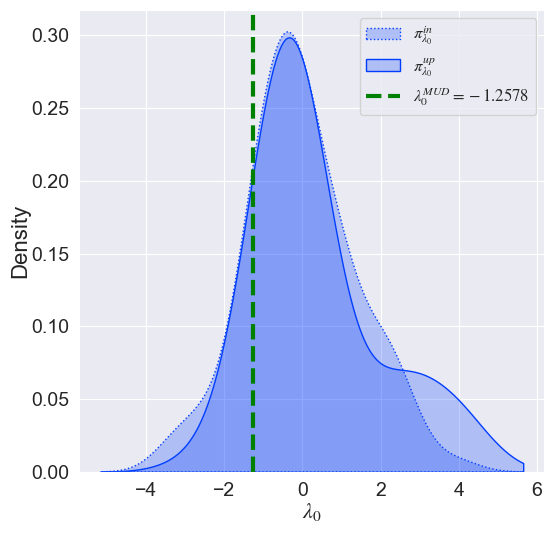

In [55]:
full_prob.probs[0].best.plot_L()

In [59]:
def plot_L(
    df,
    param_idx=0,
    param_col="lam",
    ratio_col="ratio",
    weight_col="weight",
    initial_kwargs={},
    update_kwargs={},
    plot_legend=True,
    ax=None,
    figsize=(6, 6),
):
    """
    Plot Lambda Space Distributions

    Plot distributions over parameter space. This includes the initial and
    the updated distributions.

    Parameters
    ----------
    df: pd.DataFrame, default=None
        Dataframe to use for accessing data. Defaults to the classes's
        `self.state` DataFrame. Can be used by sub-classes that store past
        states for plotting them.
    param_idx : int, default=0
        Index of parameter, `lam` to plot.
    param_col: str, default='lam'
        Column in DataFrame storing the parameter values to use.
    ratio_col : str, default='ratio'
        Column in DataFrame storing the `ratio` to use.
    plot_legend: bool, default=True
        Whether to include a labeled legend in the plot. Note, labels of
        what is plotted are returned along with the axis object for
        sub-classes to modify the legend as necessary.
    ax: matplotlib.pyplot.axes, default=None
        Axis to plot onto. If none provided, figure will be created.
    figsize: Tuple, default=(6, 6)
        If no axis to plot on is specified, then figure created will be of
        this size.

    Returns
    -------
    ax, labels : Tuple
        Tuple of (1) matplotlib axis object where distributions where
        plotted and (2) List of labels that were plotted, in order plotted.
    """
    labels = []
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    n_params = len([c for c in df.columns if c.startswith(param_col)])
    bright_colors = sns.color_palette("bright", n_colors=n_params)
    # deep_colors = sns.color_palette("deep", n_colors=self.n_params)

    if initial_kwargs is not None:
        pi_in_label = f"$\pi^{{in}}_{{\lambda_{param_idx}}}$"
        init_args = dict(
            data=df,
            x=f"{param_col}_{param_idx}",
            ax=ax,
            fill=True,
            color=bright_colors[param_idx],
            linestyle=":",
            label=pi_in_label,
            weights=weight_col,
        )
        init_args.update(initial_kwargs)
        sns.kdeplot(**init_args)
        labels.append(init_args["label"])

    if update_kwargs is not None:
        pi_up_label = f"$\pi^{{up}}_{{\lambda_{param_idx}}}$"
        update_args = dict(
            data=df,
            x=f"{param_col}_{param_idx}",
            ax=ax,
            fill=True,
            color=bright_colors[param_idx],
            label=pi_up_label,
            weights=df[weight_col] * df[ratio_col],
        )
        update_args.update(update_kwargs)
        sns.kdeplot(**update_args)
        labels.append(update_args["label"])

    # Set plot specifications
    ax.set_xlabel(f"$\lambda_{param_idx}$")
    if plot_legend:
        ax.legend(
            labels=labels,
            fontsize=12,
            title_fontsize=12,
        )

    # fig.tight_layout()

    return ax, labels

(<Axes: xlabel='$\\lambda_2$', ylabel='Density'>,
 ['$\\pi^{in}_{\\lambda_2}$', '$\\pi^{up}_{\\lambda_2}$'])

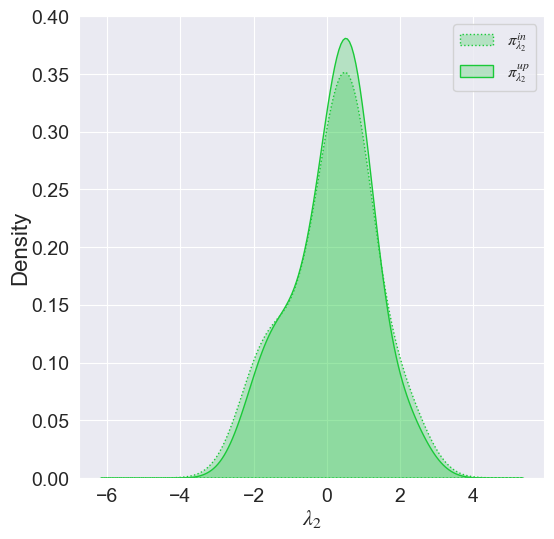

In [61]:
plot_L
    first_iteration,
    param_idx=2,
    param_col='lam',
    ratio_col='ratio_best_0',
    weight_col='weighted_ratio_best_0',
)

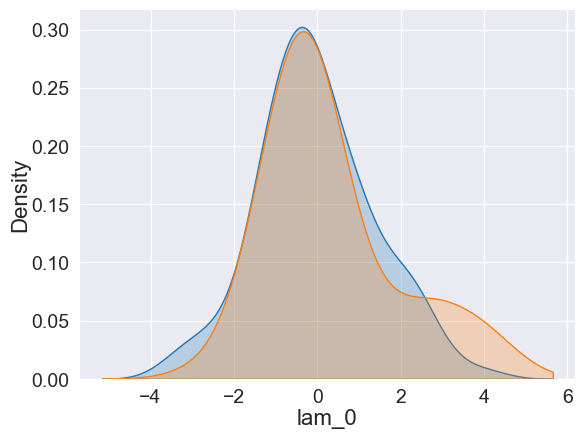

In [54]:
import seaborn as sns
ax = sns.kdeplot(
    data=first_iteration,
    x='lam_0',
    fill=True,
)
ax = sns.kdeplot(
    data=first_iteration,
    x='lam_0',
    fill=True,
    weights='weighted_ratio_best_0',
    ax=ax,
)

In [96]:
[c for c in first_iteration.columns if c.startswith('best')]

['best_flag']

Text(0.5, 1.0, 'First Iteration, Search Index 7 Results')

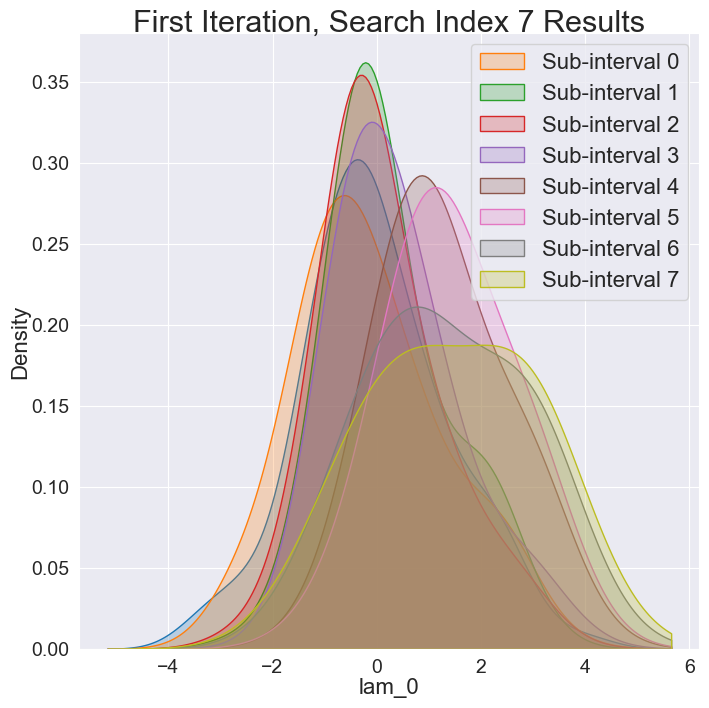

In [90]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))

search_7 = [c for c in first_iteration.columns if c.startswith('weighted_ratio_search_7_0_state')]

ax = sns.kdeplot(
    data=first_iteration,
    x='lam_0',
    fill=True,
)

for i, c in enumerate(search_7):
    ax = sns.kdeplot(
        data=first_iteration,
        x='lam_0',
        fill=True,
        weights=c,
        ax=ax,
        label=f'Sub-interval {i}'
    )

ax.legend()
ax.set_title('First Iteration, Search Index 7 Results')

In [78]:
first_iteration_results[first_iteration_results['search_index'] == 7]

e_r        kl  k_eff  k_eff_up  solved  lam_MUD_0  lam_MUD_1  \
0 0  0.910382  0.589079   1.00      1.00    True  -0.701728  -0.921893   
  0  0.924530  0.741427   1.00      1.00    True  -0.470832   0.730065   
  0  1.059689  0.187413   1.00      1.00    True  -0.470832   0.730065   
  0  1.150689  0.291627   1.00      1.00    True  -0.470832   0.730065   
  0  0.994455  0.645423   1.00      0.96    True   1.219365   0.909631   
  0  1.166344  0.107745   0.96      0.94    True   1.219365   0.909631   
  0  0.826423  0.420271   0.94      0.94    True   1.219365   0.909631   
  0  1.038419  0.098608   0.94      0.91    True   2.813573  -0.691082   

     lam_MUD_2  lam_MUD_3  lam_MUD_4  ...           pca_mask  i  I  \
0 0  -0.605749  -1.245464   0.458492  ...      range(0, 688)  1  8   
  0  -0.362644   1.140120   0.034262  ...   range(688, 1376)  2  8   
  0  -0.362644   1.140120   0.034262  ...  range(1376, 2064)  3  8   
  0  -0.362644   1.140120   0.034262  ...  range(2064, 2752)  4  8   
  0  -1.032082  -1.143926   0.452347  ...  range(2752, 3439)  5  8   
  0  -1.032082  -1.143926   0.452347  ...  range(3439, 4126)  6  8   
  0  -1.032082  -1.143926   0.452347  ...  range(4126, 4813)  7  8   
  0   0.508374   0.557711   0.228500  ...  range(4813, 5500)  8  8   

     search_index  predict_delta  within_thresh valid closest  max_kl  min_kl  
0 0             7       0.089618           True  True   False   False   False  
  0             7       0.075470           True  True   False   False   False  
  0             7       0.059689           True  True   False   False   False  
  0             7       0.150689           True  True   False   False   False  
  0             7       0.005545           True  True   False   False   False  
  0             7       0.166344           True  True   False   False   False  
  0             7       0.173577           True  True   False   False   False  
  0             7       0.038419           True  True   False   False    True  

[8 rows x 27 columns]

In [ ]:
# 